# Librerías

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from datetime import datetime
!pip3 install pandas_profiling --upgrade #DESCOMENTAR PARA INSTALAR LA BIBLIOTECA, luego de hacerlo reiniciar el entorno de ejecución para poder utilizarla
from pandas_profiling import ProfileReport
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from scipy import stats
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

from pandas.plotting import scatter_matrix

import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

<ipython-input-1-788975cb687a>:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Lectura de los datos

## Dataset **train**

In [2]:
dataframe = pd.read_csv('energy.csv', header=0, index_col=0)
dataframe.head()

Country                Energy_type  Year  Energy_consumption  \
0   World           all_energy_types  1980          292.899790   
1   World                       coal  1980           78.656134   
2   World                natural_gas  1980           53.865223   
3   World  petroleum_n_other_liquids  1980          132.064019   
4   World                    nuclear  1980            7.575700   

   Energy_production           GDP    Population  Energy_intensity_per_capita  \
0         296.337228  27770.910281  4.298127e+06                    68.145921   
1          80.114194  27770.910281  4.298127e+06                    68.145921   
2          54.761046  27770.910281  4.298127e+06                    68.145921   
3         133.111109  27770.910281  4.298127e+06                    68.145921   
4           7.575700  27770.910281  4.298127e+06                    68.145921   

   Energy_intensity_by_GDP  CO2_emission  
0                   10.547   4946.627130  
1                   10.547   1409.790188  
2                   10.547   1081.593377  
3                   10.547   2455.243565  
4                   10.547      0.000000

## Dataset **test**

In [3]:
max_year = dataframe['Year'].max()  # Obtiene el valor máximo de la columna "Year"
print(max_year)

2019


In [4]:
min_year = dataframe['Year'].min()  # Obtiene el valor máximo de la columna "Year"
print(min_year)

1980


In [5]:
#df_2019 = dataframe.loc[dataframe['Year'] == 2019]

In [6]:
#df_2019.head()

In [7]:
dataframe = dataframe[dataframe['Year']>1980]

In [8]:
dataframe.head()

Country                Energy_type  Year  Energy_consumption  \
1386   World           all_energy_types  1981          289.401022   
1387   World                       coal  1981           78.963581   
1388   World                natural_gas  1981           53.895423   
1389   World  petroleum_n_other_liquids  1981          126.811132   
1390   World                    nuclear  1981            8.527153   

      Energy_production           GDP    Population  \
1386         291.287773  28665.819138  4.377060e+06   
1387          80.460729  28665.819138  4.377060e+06   
1388          55.573537  28665.819138  4.377060e+06   
1389         125.438949  28665.819138  4.377060e+06   
1390           8.527153  28665.819138  4.377060e+06   

      Energy_intensity_per_capita  Energy_intensity_by_GDP  CO2_emission  
1386                     66.11768                10.095683  18701.974390  
1387                     66.11768                10.095683   7474.451783  
1388                     66.11768                10.095683   2842.337165  
1389                     66.11768                10.095683   8385.185441  
1390                     66.11768                10.095683      0.000000

#Analisis de caracteristicas del dataset


In [12]:
con2 = dataframe[dataframe['Country']!='World'][dataframe['Energy_type']=='all_energy_types']

temp_con2 = con2[['Country', 'Year', 'CO2_emission']].groupby(['Country','Year']).sum().reset_index()

px.choropleth(data_frame=temp_con2, locations="Country", locationmode='country names', animation_frame="Year",
              color='CO2_emission', title="Emission CO2 of each country from 1988 to 2019 (quad Btu)")

##Campos nulos

<Axes: >

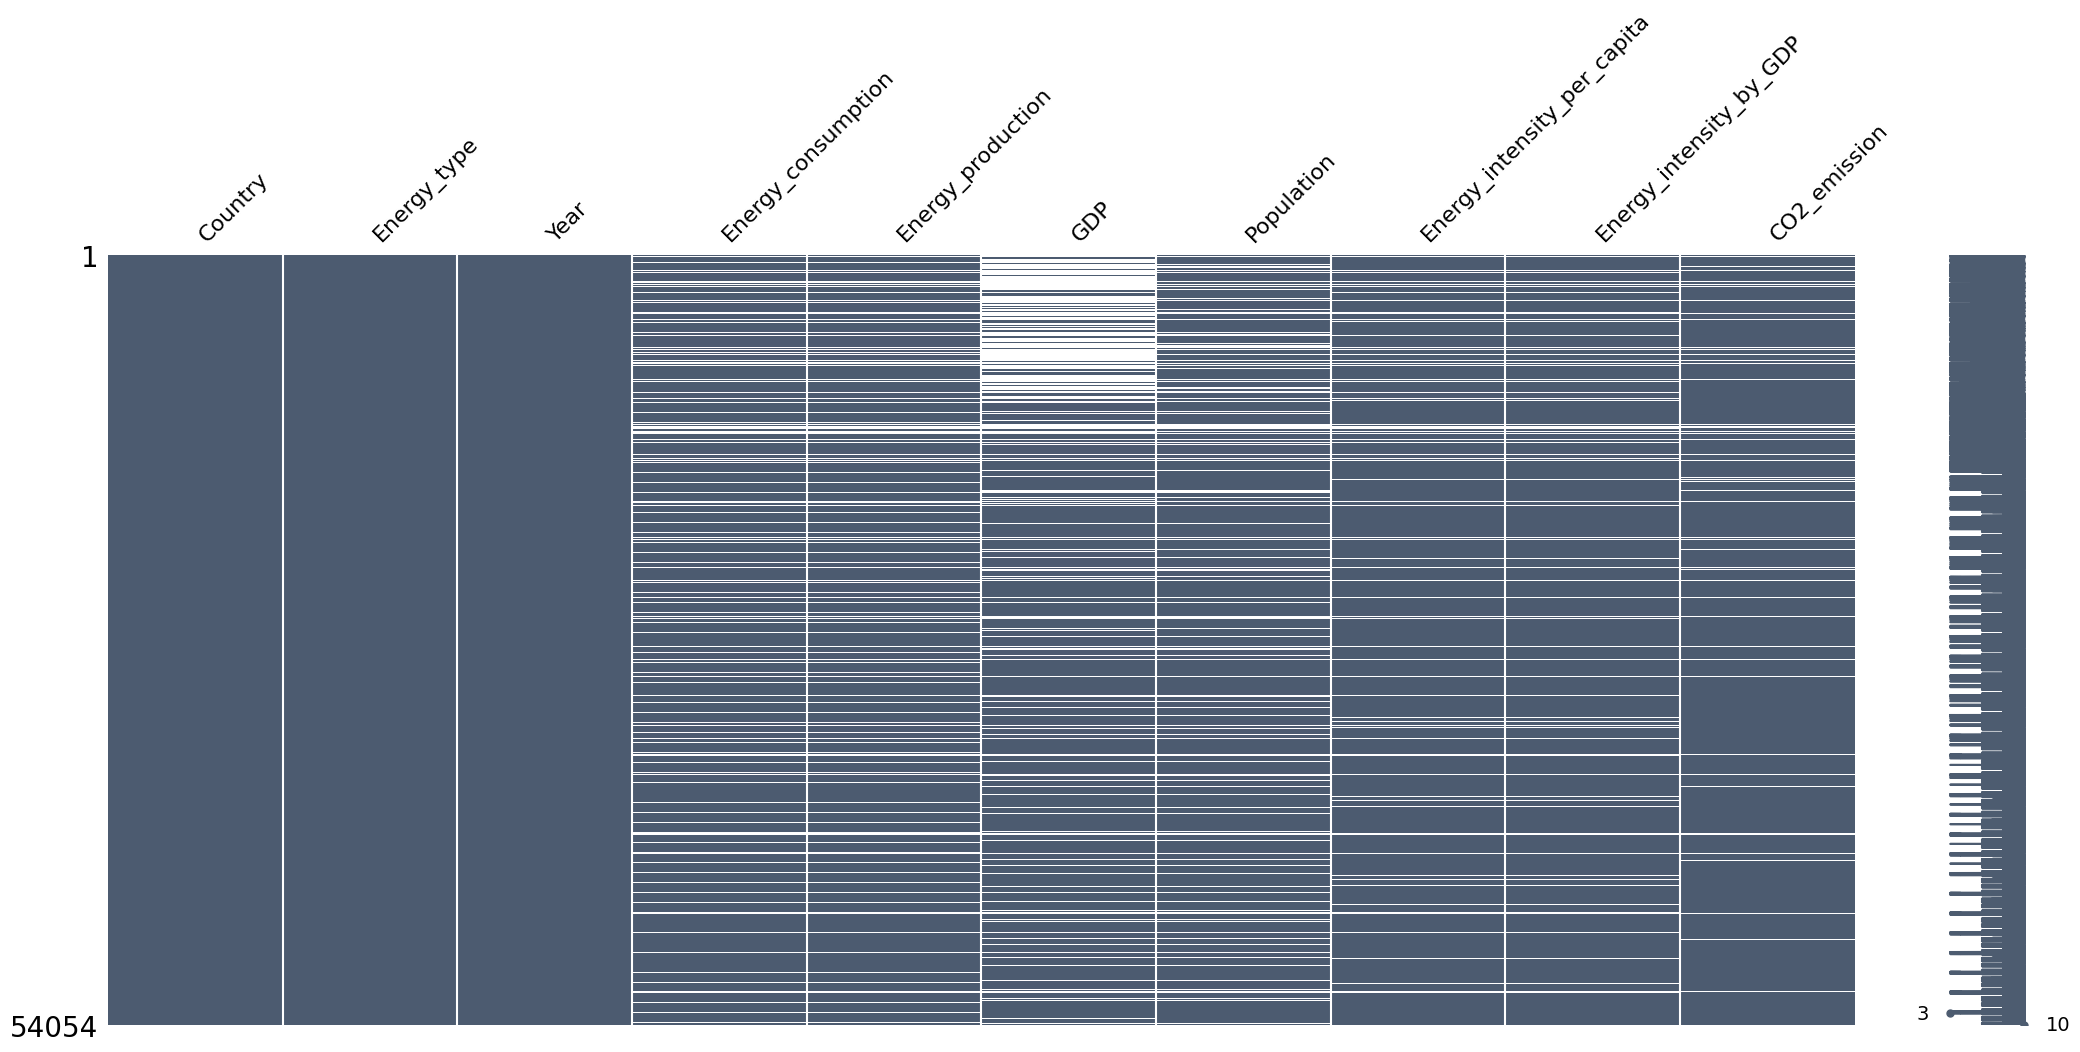

In [247]:
import missingno as msno
msno.matrix(dataframe,color=(0.3,0.36,0.44))

In [248]:
dataframe.dropna(subset=['CO2_emission'], inplace=True)

<Axes: >

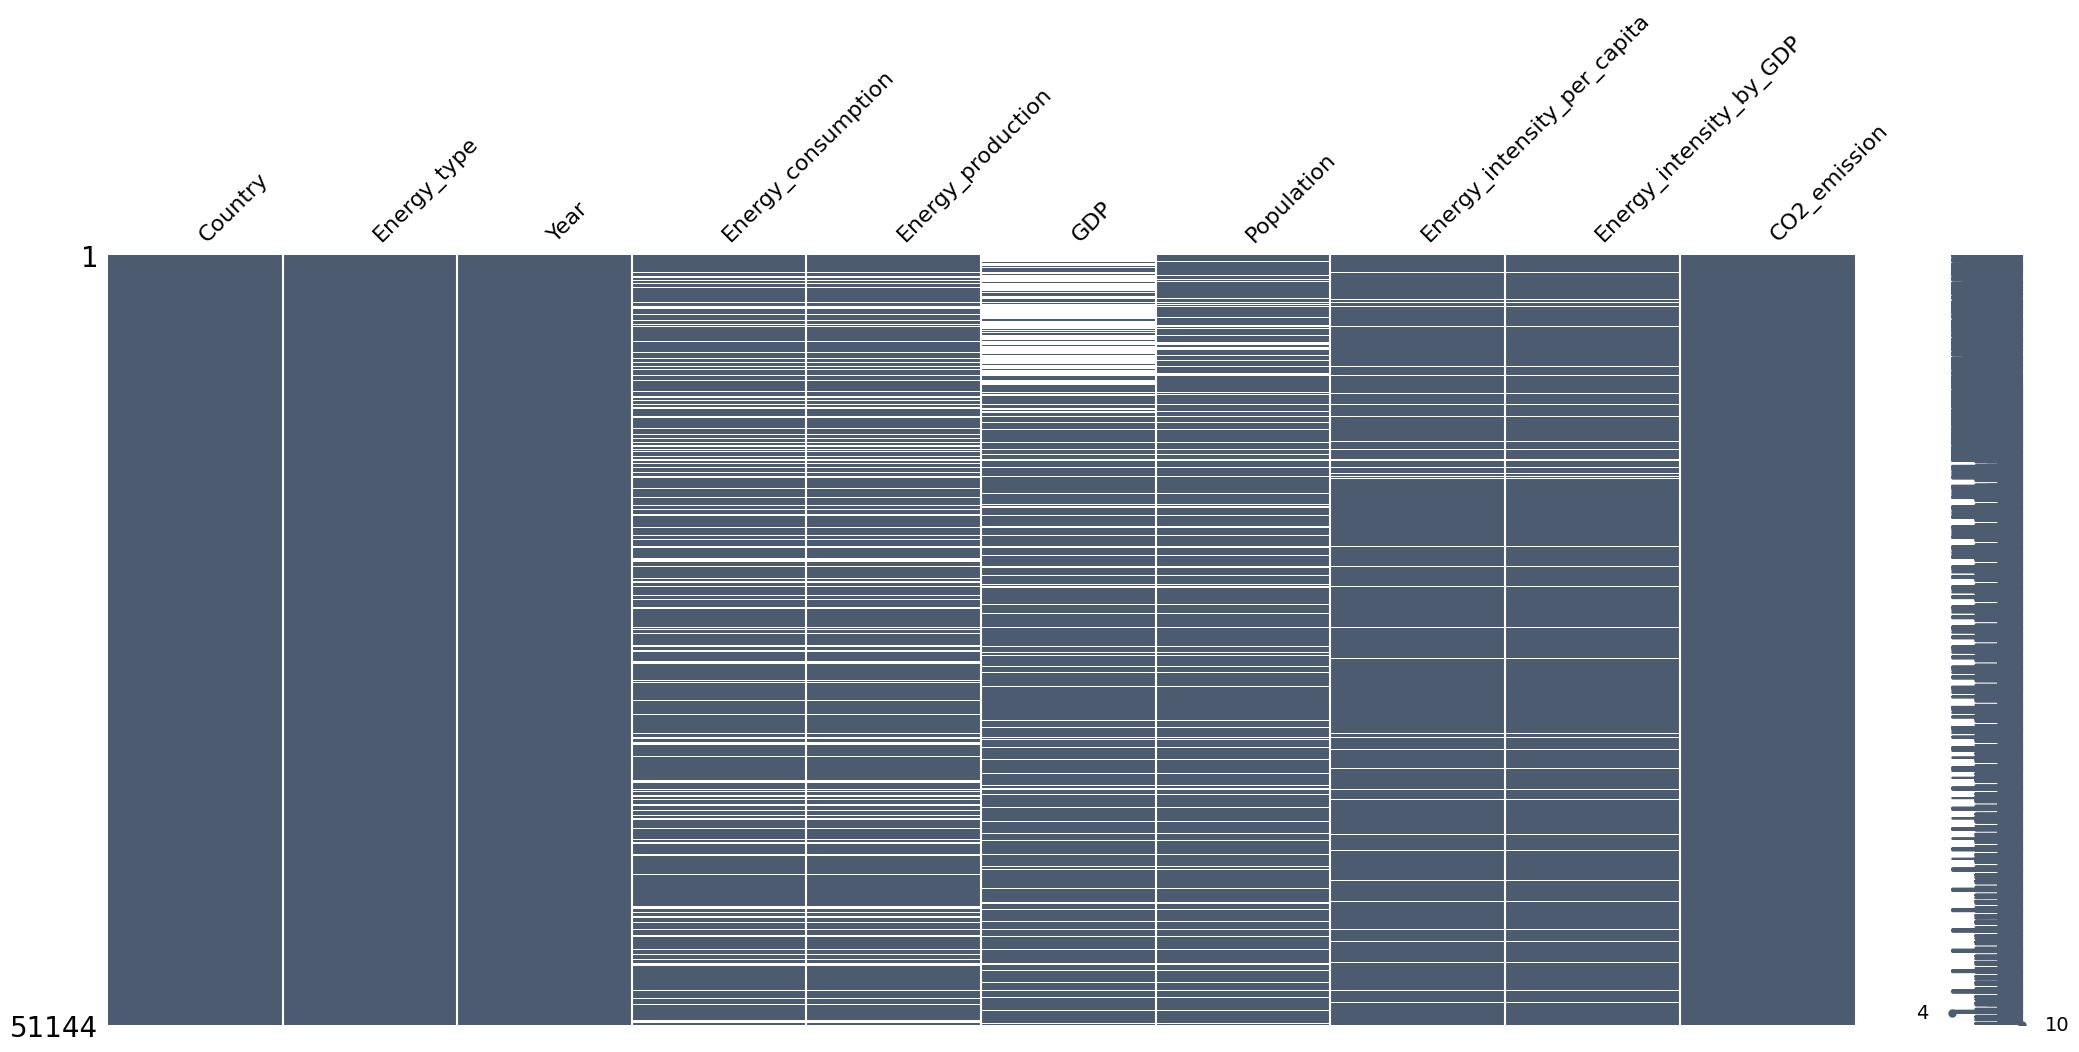

In [249]:
import missingno as msno
msno.matrix(dataframe,color=(0.3,0.36,0.44))

In [250]:
temp_gdp = pd.DataFrame(dataframe['GDP'].isnull().groupby(dataframe['Country']).sum()).reset_index()
# Countries with more than 90 missing GDP values
temp_gdp = temp_gdp[temp_gdp['GDP']>=90]

temp_gdp

Country  GDP
3                  American Samoa  132
5                      Antarctica  234
45                   Cook Islands  234
64               Falkland Islands  234
65                  Faroe Islands  221
68          Former Czechoslovakia  130
69   Former Serbia and Montenegro  134
70                Former U.S.S.R.  126
71              Former Yugoslavia  126
73                  French Guiana  234
74               French Polynesia  234
79                  Germany, East  122
80                  Germany, West  122
82                      Gibraltar  234
87                           Guam  132
93            Hawaiian Trade Zone  106
133                    Micronesia  161
137                    Montserrat  234
141                         Nauru  234
145                 New Caledonia  234
150                          Niue  234
171                  Saint Helena  233
174     Saint Pierre and Miquelon  234
210      Turks and Caicos Islands  213
211                        Tuvalu  158
212          U.S. Pacific Islands  234
213              U.S. Territories  156
225                   Wake Island  234
226                Western Sahara  234

<Axes: >

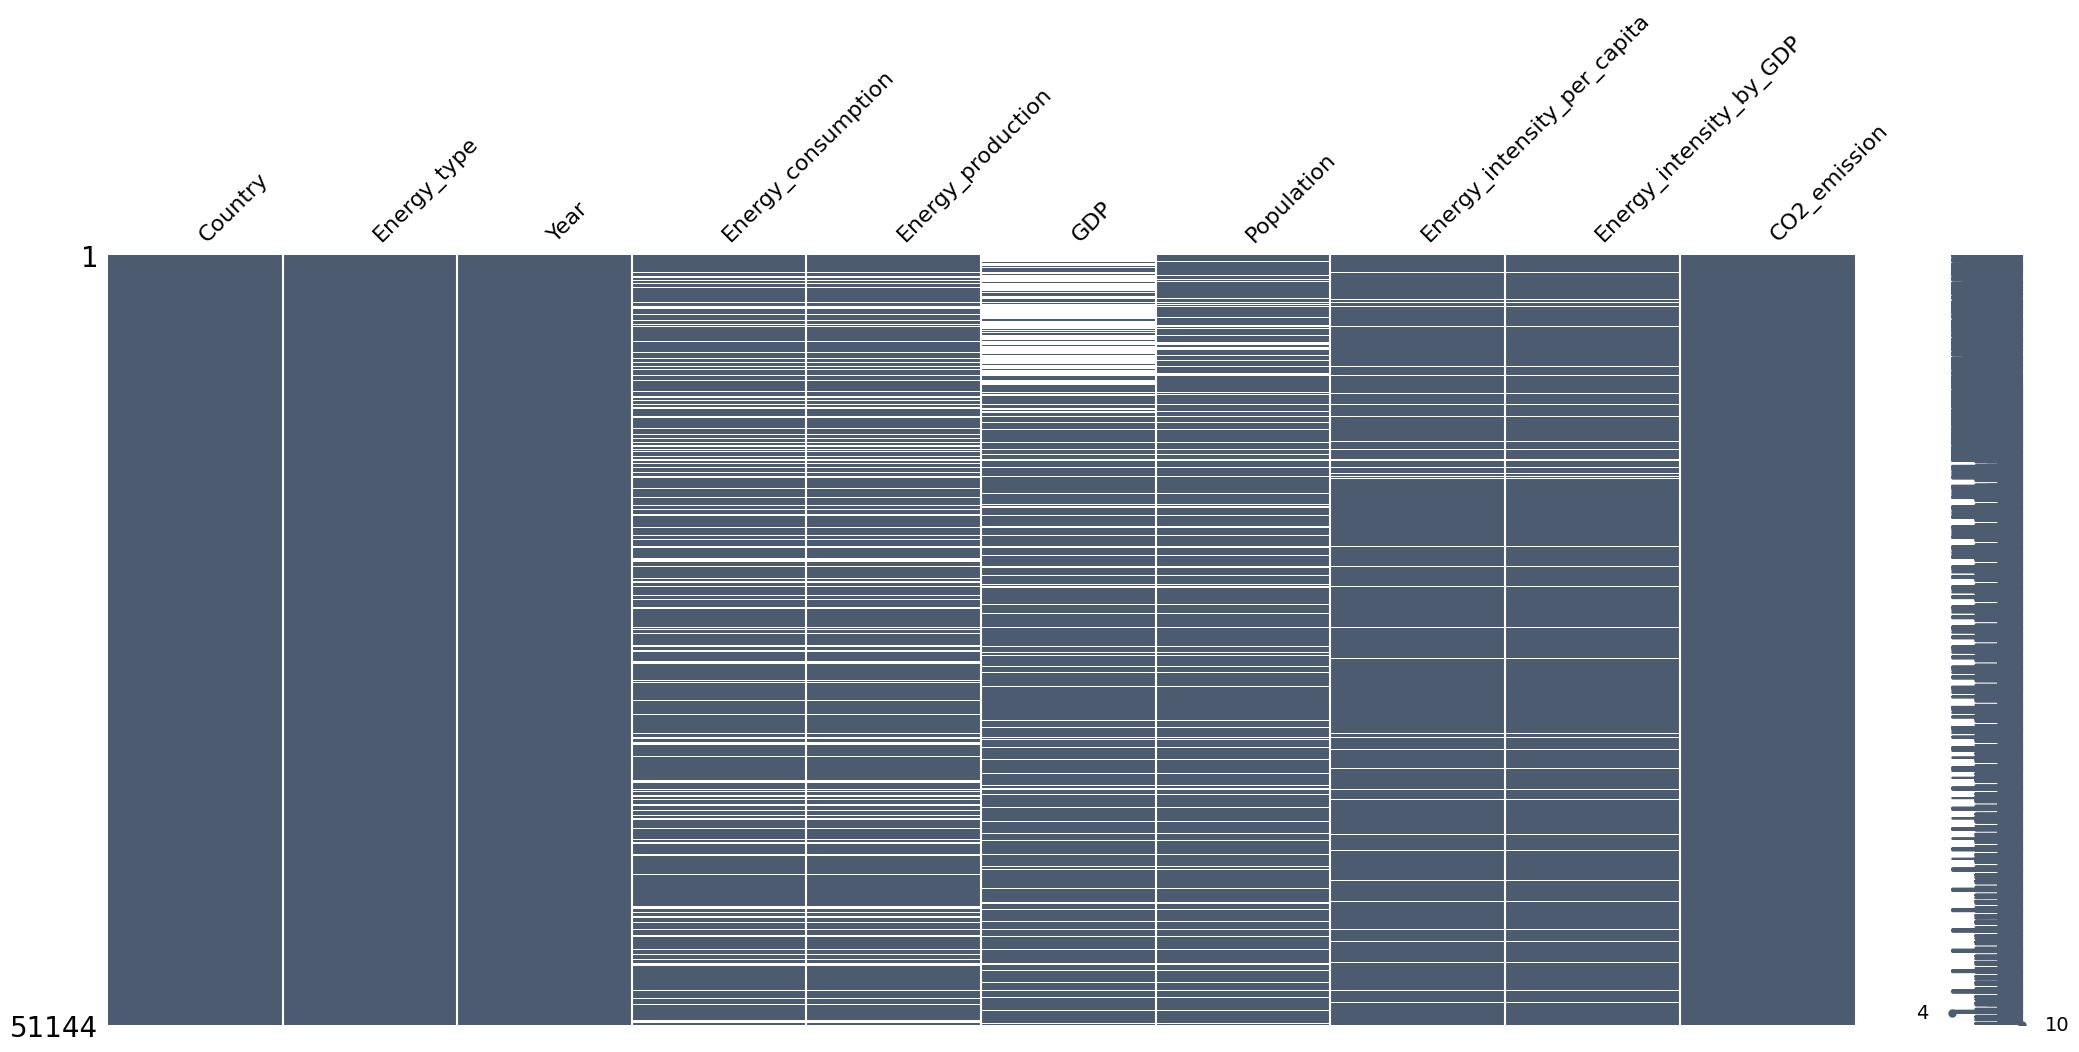

In [251]:
import missingno as msno
msno.matrix(dataframe,color=(0.3,0.36,0.44))

In [252]:
def to_drop(list):
    for country in list:
        value = dataframe[dataframe['Country']==country].index
        dataframe.drop(labels=value, axis=0, inplace=True)

In [253]:
# Splitting e_type nuclear from rest of dataset
nuclear = dataframe[dataframe['Energy_type']=='nuclear']

# Keeping the remaining of the main dataset
temp_ecp = dataframe[dataframe['Energy_type']!='nuclear']

# Replacing all Nan values of e_con and e_prod of e_type nuclear to 0
nuclear[['Energy_consumption', 'Energy_production']] = nuclear[['Energy_consumption', 'Energy_production']].replace(np.nan, 0)

# Joining them back up
dataframe = pd.concat([nuclear, temp_ecp]).sort_index()

###GDP

In [254]:
temp_gdp = pd.DataFrame(dataframe['GDP'].isnull().groupby(dataframe['Country']).sum()).reset_index()
# Countries with more than 90 missing GDP values
temp_gdp = temp_gdp[temp_gdp['GDP']>=90]

temp_gdp

Country  GDP
3                  American Samoa  132
5                      Antarctica  234
45                   Cook Islands  234
64               Falkland Islands  234
65                  Faroe Islands  221
68          Former Czechoslovakia  130
69   Former Serbia and Montenegro  134
70                Former U.S.S.R.  126
71              Former Yugoslavia  126
73                  French Guiana  234
74               French Polynesia  234
79                  Germany, East  122
80                  Germany, West  122
82                      Gibraltar  234
87                           Guam  132
93            Hawaiian Trade Zone  106
133                    Micronesia  161
137                    Montserrat  234
141                         Nauru  234
145                 New Caledonia  234
150                          Niue  234
171                  Saint Helena  233
174     Saint Pierre and Miquelon  234
210      Turks and Caicos Islands  213
211                        Tuvalu  158
212          U.S. Pacific Islands  234
213              U.S. Territories  156
225                   Wake Island  234
226                Western Sahara  234

In [255]:
# Making List of all these countries
m_gdp = [country for country in temp_gdp['Country']]

# Dropping all the countries on the list from the main dataset (Function used is the one above)
to_drop(m_gdp)

In [256]:
temp_gdp = dataframe[dataframe['Year']<=1990]
temp_gdp.groupby('Year')['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission'].count()

Energy_consumption  Energy_production   GDP  Population  \
Year                                                            
1981                1054               1054   311         999   
1982                1054               1054   311         999   
1983                1054               1054   311         999   
1984                1054               1054   311         987   
1985                1054               1054   311         987   
1986                1055               1055   311         989   
1987                1059               1059   311         993   
1988                1059               1059   977        1017   
1989                1059               1059   983        1023   
1990                1060               1060  1009        1025   

      Energy_intensity_per_capita  Energy_intensity_by_GDP  CO2_emission  
Year                                                                      
1981                          994                      994          1085  
1982                          994                      994          1085  
1983                          994                      994          1085  
1984                          994                      994          1085  
1985                          994                      994          1085  
1986                          996                      996          1085  
1987                         1000                     1000          1089  
1988                         1000                     1000          1089  
1989                         1000                     1000          1089  
1990                         1002                     1002          1089

In [257]:
# Looking further into the GDP data before 1988
temp_gdp = pd.DataFrame(temp_gdp['GDP'].isnull().groupby(temp_gdp['Country']).sum()).reset_index()

# Countries with more than 30 missing GDP values
temp_gdp = temp_gdp[temp_gdp['GDP']>30]
temp_gdp.head(200)

Country  GDP
0            Afghanistan   42
1                Albania   42
2                Algeria   42
3                 Angola   42
4    Antigua and Barbuda   42
..                   ...  ...
195              Vanuatu   42
197              Vietnam   42
199                Yemen   54
200               Zambia   42
201             Zimbabwe   42

[119 rows x 2 columns]

In [258]:
dataframe = dataframe[dataframe['Year']>=1993]

In [259]:
dataframe.head()

Country                Energy_type  Year  Energy_consumption  \
18018   World           all_energy_types  1993          355.676348   
18019   World                       coal  1993           90.358089   
18020   World                natural_gas  1993           79.110242   
18021   World  petroleum_n_other_liquids  1993          136.158710   
18022   World                    nuclear  1993           22.008422   

       Energy_production           GDP    Population  \
18018         354.594327  52108.495098  5.581569e+06   
18019          89.794006  52108.495098  5.581569e+06   
18020          78.261716  52108.495098  5.581569e+06   
18021         136.166179  52108.495098  5.581569e+06   
18022          22.008422  52108.495098  5.581569e+06   

       Energy_intensity_per_capita  Energy_intensity_by_GDP  CO2_emission  
18018                    63.723367                 6.825688  21766.142147  
18019                    63.723367                 6.825688   8579.464301  
18020                    63.723367                 6.825688   4075.491754  
18021                    63.723367                 6.825688   9111.186091  
18022                    63.723367                 6.825688      0.000000

<Axes: >

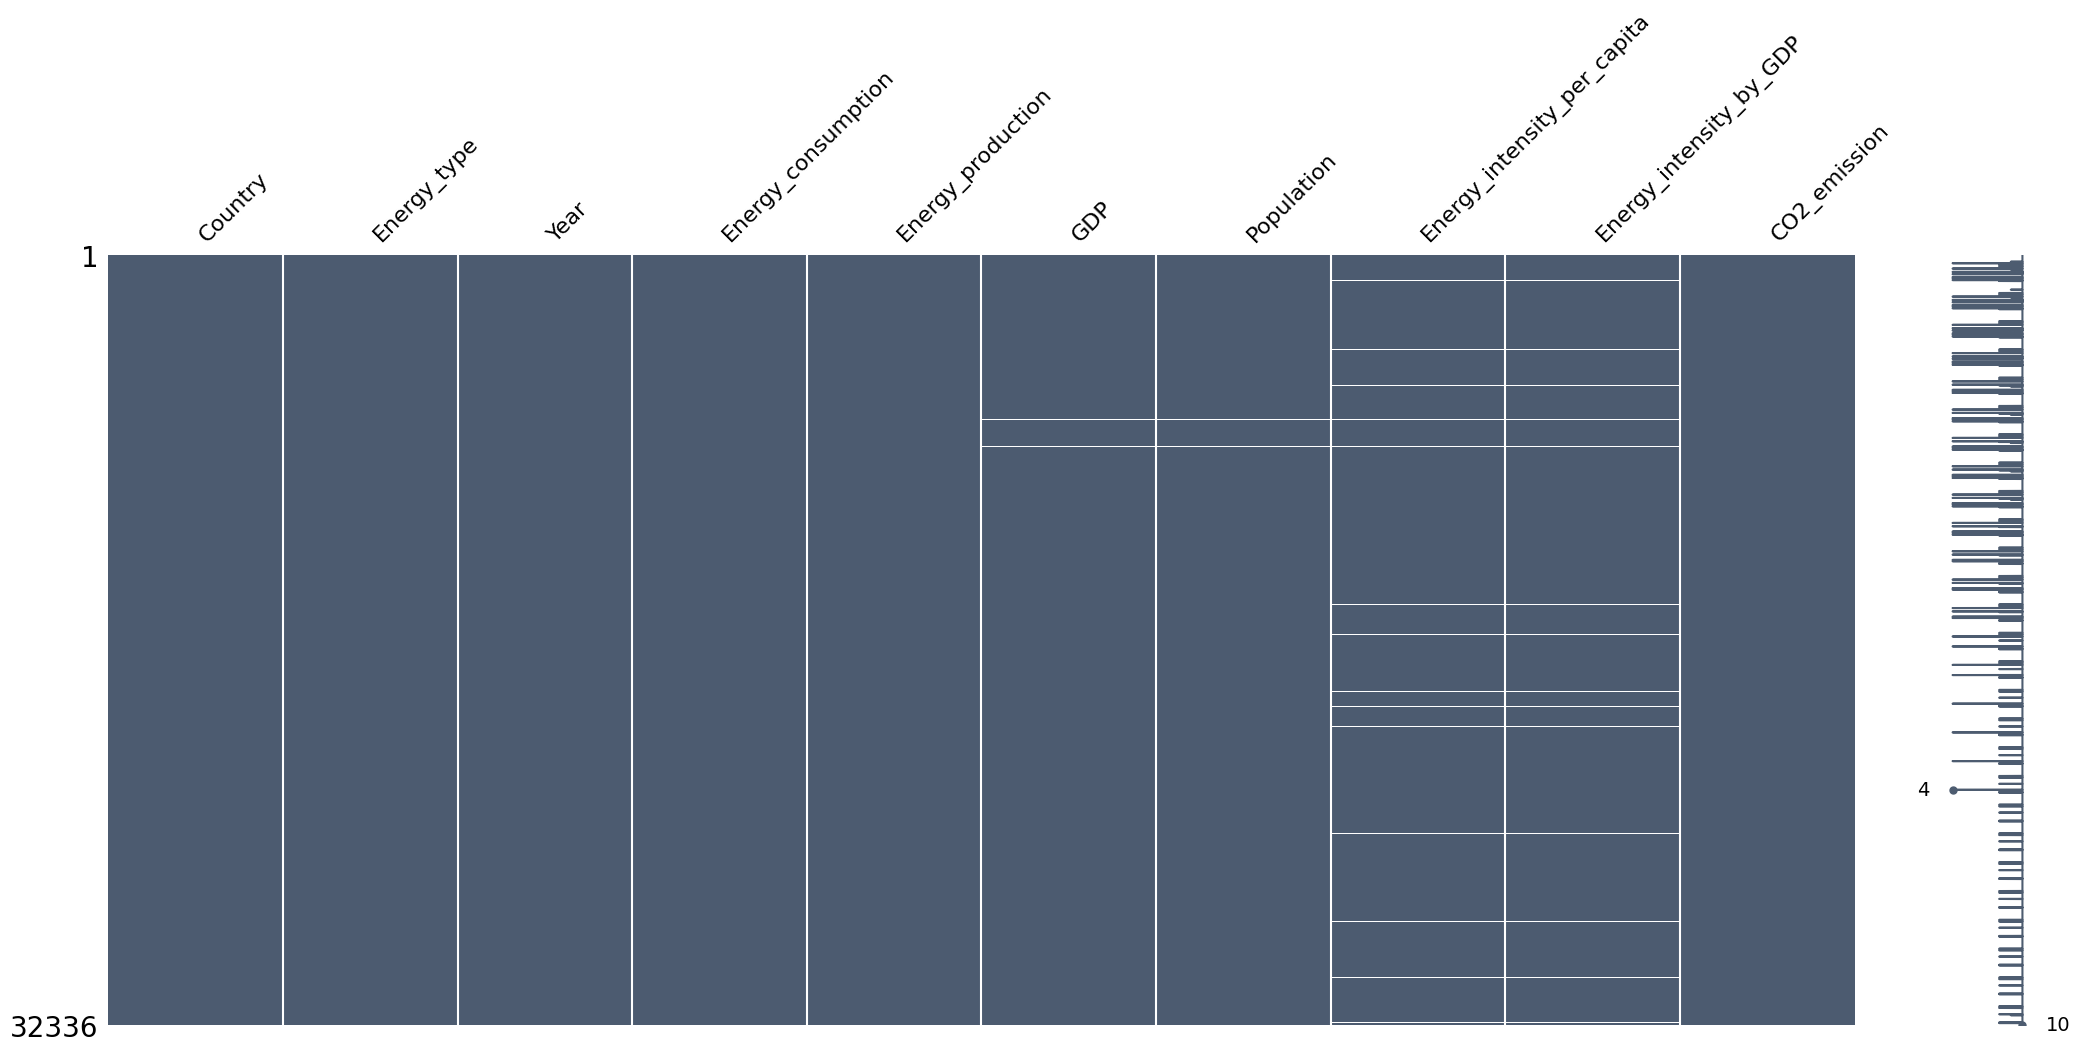

In [260]:
msno.matrix(dataframe,color=(0.3,0.36,0.44))

### consumo energetico per capita

In [261]:
# ei_capita
temp_ei_capita = pd.DataFrame(dataframe['Energy_intensity_per_capita'].isnull().groupby(dataframe['Country']).sum()).reset_index()
# Countries with missing ei_capita values
temp_ei_capita = temp_ei_capita[temp_ei_capita['Energy_intensity_per_capita']>0]


# ei_gdp
temp_ei_gdp = pd.DataFrame(dataframe['Energy_intensity_per_capita'].isnull().groupby(dataframe['Country']).sum()).reset_index()
# Countries with missing ei_gdp values
temp_ei_gdp = temp_ei_gdp[temp_ei_gdp['Energy_intensity_per_capita']>0]


print(temp_ei_capita, '\n')
print(temp_ei_gdp)

                     Country  Energy_intensity_per_capita
57                   Eritrea                            2
70                 Greenland                          162
81                   Iceland                          162
95                    Kosovo                           30
119               Montenegro                           26
125     Netherlands Antilles                          162
136  Palestinian Territories                            8
157                   Serbia                           26
167              South Sudan                           38
180              Timor-Leste                           20
183      Trinidad and Tobago                          162
187      U.S. Virgin Islands                          162 

                     Country  Energy_intensity_per_capita
57                   Eritrea                            2
70                 Greenland                          162
81                   Iceland                          162
95          

###ei_capita and ei_gdp columns

In [262]:
# ei_capita
temp_ei_capita = pd.DataFrame(dataframe['Energy_intensity_per_capita'].isnull().groupby(dataframe['Country']).sum()).reset_index()
# Countries with missing ei_capita values
temp_ei_capita = temp_ei_capita[temp_ei_capita['Energy_intensity_per_capita']>0]


# ei_gdp
temp_ei_gdp = pd.DataFrame(dataframe['Energy_intensity_by_GDP'].isnull().groupby(dataframe['Country']).sum()).reset_index()
# Countries with missing ei_gdp values
temp_ei_gdp = temp_ei_gdp[temp_ei_gdp['Energy_intensity_by_GDP']>0]


print(temp_ei_capita, '\n')
print(temp_ei_gdp)

                     Country  Energy_intensity_per_capita
57                   Eritrea                            2
70                 Greenland                          162
81                   Iceland                          162
95                    Kosovo                           30
119               Montenegro                           26
125     Netherlands Antilles                          162
136  Palestinian Territories                            8
157                   Serbia                           26
167              South Sudan                           38
180              Timor-Leste                           20
183      Trinidad and Tobago                          162
187      U.S. Virgin Islands                          162 

                     Country  Energy_intensity_by_GDP
57                   Eritrea                        2
70                 Greenland                      162
81                   Iceland                      162
95                    Kosovo

In [263]:
# Making List of all these countries
m_ei_capita = [country for country in temp_ei_capita['Country']]
m_ei_gdp = [country for country in temp_ei_gdp['Country']]

# Dropping all the countries on the list from the main dataset
to_drop(m_ei_capita)
to_drop(m_ei_gdp)

###Population


In [351]:
temp_pop = pd.DataFrame(dataframe[dataframe['Population'].isnull()])
cont = temp_pop['Country'].unique()

print(cont)

to_drop(cont)
['Former Czechoslovakia' 'Former U.S.S.R.' 'Former Yugoslavia'
 'Germany, East' 'Germany, West' 'Hungary' 'Poland'
 'Former Serbia and Montenegro']

[]


['Former CzechoslovakiaFormer U.S.S.R.Former YugoslaviaGermany, EastGermany, WestHungaryPolandFormer Serbia and Montenegro']

In [265]:
temp_pop = pd.DataFrame(dataframe['Population'].isnull().groupby(dataframe['Country']).sum()).reset_index()
# Countries with more than 100 missing Population values
temp_pop = temp_pop[temp_pop['Population']>=100]

temp_pop

Empty DataFrame
Columns: [Country, Population]
Index: []

##Boxplot y valores outliers


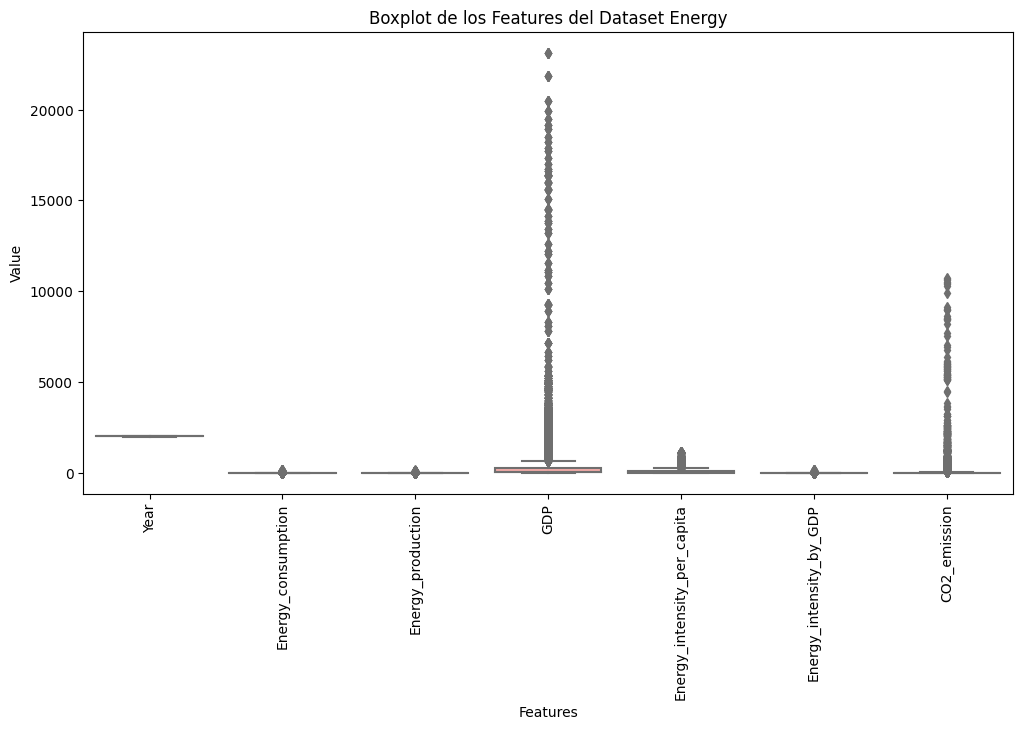

In [266]:
# Filtrar el dataset para excluir el país "World" y eliminar la variable "Population"
df_energy_filtered = dataframe[dataframe['Country'] != 'World'].drop('Population', axis=1)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Generar el boxplot
sns.boxplot(data=df_energy_filtered)

# Ajustar las etiquetas de los ejes
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Value')

# Añadir título al gráfico
plt.title('Boxplot de los Features del Dataset Energy')

# Mostrar el gráfico
plt.show()

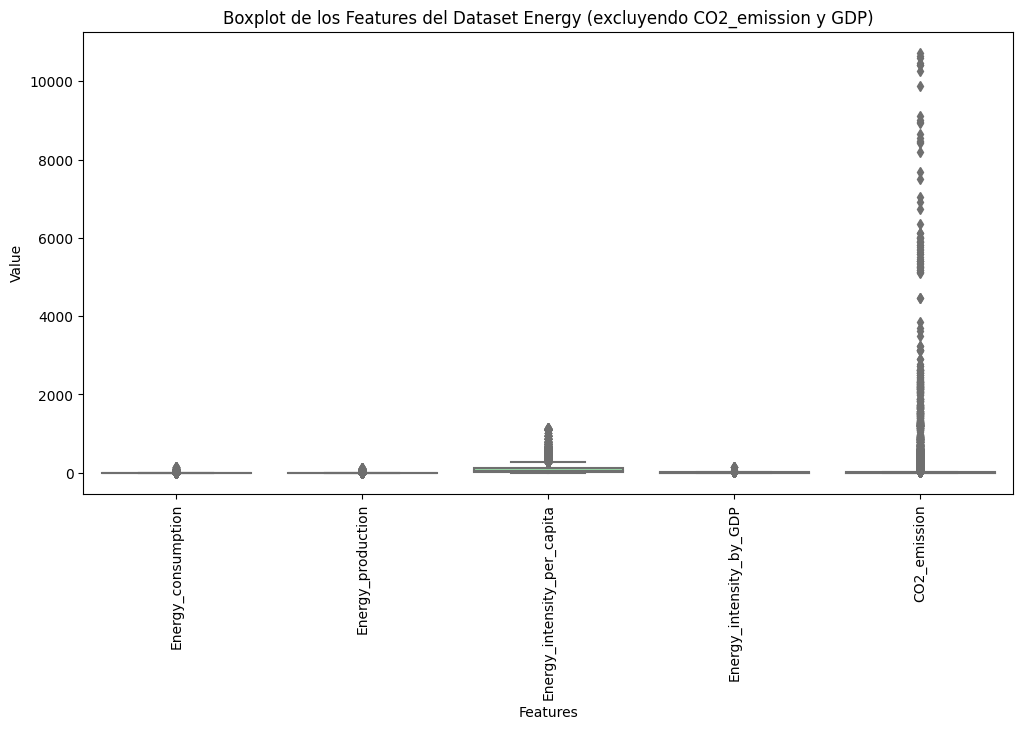

In [267]:
# Filtrar el dataset para excluir el país "World" y eliminar las variables "CO2_emission" y "GDP"
df_energy_filtered = dataframe[dataframe['Country'] != 'World'].drop(['Year' ,'Population','GDP'], axis=1)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Generar el boxplot
sns.boxplot(data=df_energy_filtered)

# Ajustar las etiquetas de los ejes
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Value')

# Añadir título al gráfico
plt.title('Boxplot de los Features del Dataset Energy (excluyendo CO2_emission y GDP)')

# Mostrar el gráfico
plt.show()


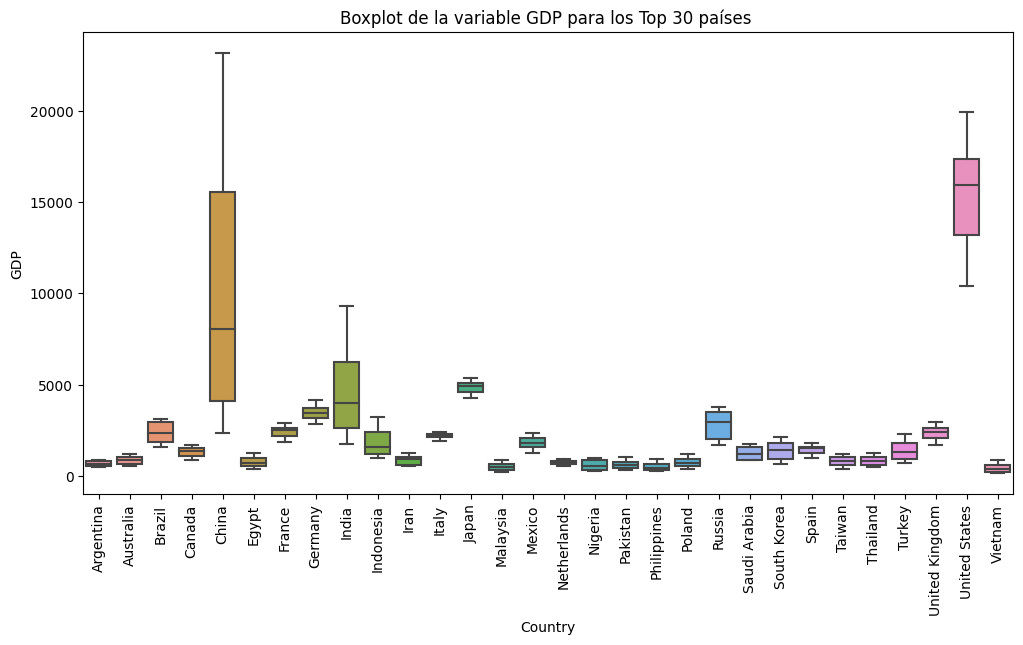

In [268]:
df_gdp_top30 = dataframe[['Country', 'GDP']]

df_gdp_top30 = df_gdp_top30[df_gdp_top30['Country'] != 'World']

top30_countries = df_gdp_top30.groupby('Country')['GDP'].max().nlargest(30).index.tolist()

df_gdp_top30 = df_gdp_top30[df_gdp_top30['Country'].isin(top30_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='GDP', data=df_gdp_top30)

# Ajustar etiquetas de los ejes
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP')

# Añadir título al gráfico
plt.title('Boxplot de la variable GDP para los Top 30 países ')

# Mostrar el gráfico
plt.show()



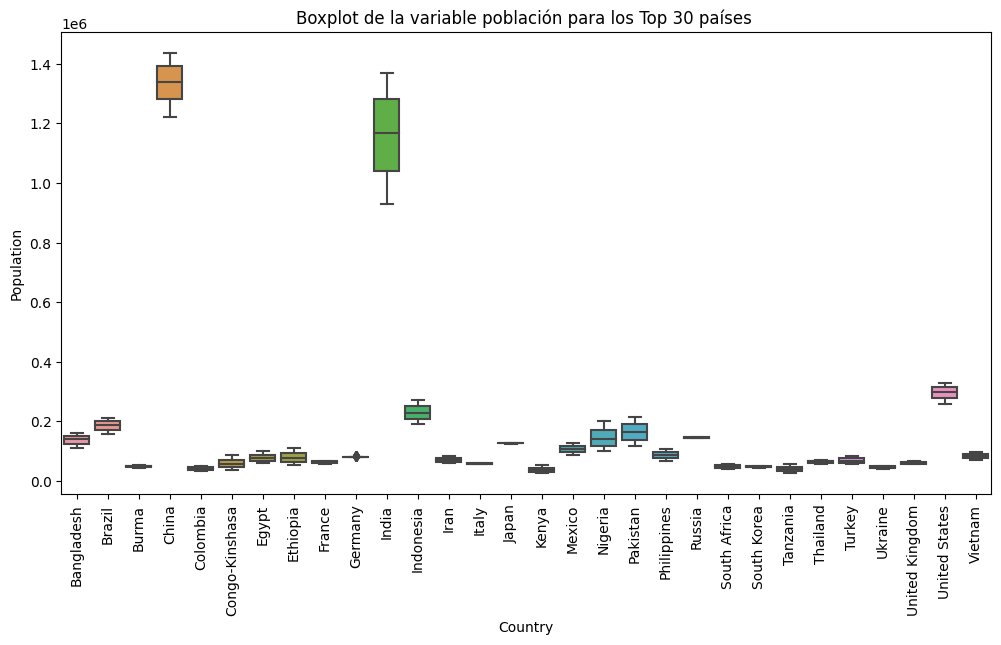

In [269]:
df_Pop_top30 = dataframe[['Country', 'Population']]

df_Pop_top30 = df_Pop_top30[df_Pop_top30['Country'] != 'World']

top30_countries = df_Pop_top30.groupby('Country')['Population'].max().nlargest(30).index.tolist()

df_Pop_top30 = df_Pop_top30[df_Pop_top30['Country'].isin(top30_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Population', data=df_Pop_top30)

# Ajustar etiquetas de los ejes
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Population')

# Añadir título al gráfico
plt.title('Boxplot de la variable población para los Top 30 países ')

# Mostrar el gráfico
plt.show()


In [271]:
con3 = dataframe[dataframe['Country']!='World'][dataframe['Energy_type']=='all_energy_types']

temp_con3 = con3[['Country', 'Year', 'CO2_emission']].groupby(['Country','Year']).sum().reset_index()

px.choropleth(data_frame=temp_con3, locations="Country", locationmode='country names', animation_frame="Year",
              color='CO2_emission', title="CO2 emission of each country from 1988 to 2019 (quad Btu)")

In [272]:
con4 = dataframe[dataframe['Country']!='World'][dataframe['Energy_type']=='all_energy_types']

temp_con4 = con4[['Country', 'Year', 'Population']].groupby(['Country','Year']).sum().reset_index()

px.choropleth(data_frame=temp_con4, locations="Country", locationmode='country names', animation_frame="Year",
              color='Population', title="Energy Consumption of each country from 1988 to 2019 (quad Btu)")

In [273]:
#dataframe['Country'] = dataframe['Country'].replace({"Germany, East": "Germany", "Germany, West": "Germany"})

In [274]:
#germany_data = dataframe[dataframe['Country'] == 'Germany']

#print("Datos agrupados de Germany para todos los años:")
#print(germany_data)

# Analisis exploratorio

In [275]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30720 entries, 18018 to 55439
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      30720 non-null  object 
 1   Energy_type                  30720 non-null  object 
 2   Year                         30720 non-null  int64  
 3   Energy_consumption           30720 non-null  float64
 4   Energy_production            30720 non-null  float64
 5   GDP                          30655 non-null  float64
 6   Population                   30720 non-null  float64
 7   Energy_intensity_per_capita  30720 non-null  float64
 8   Energy_intensity_by_GDP      30720 non-null  float64
 9   CO2_emission                 30720 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.6+ MB


In [276]:
miss_total = pd.DataFrame(dataframe.isnull().mean(),columns=['Missings']).sort_values('Missings', ascending =False)
miss_total

Missings
GDP                          0.002116
Country                      0.000000
Energy_type                  0.000000
Year                         0.000000
Energy_consumption           0.000000
Energy_production            0.000000
Population                   0.000000
Energy_intensity_per_capita  0.000000
Energy_intensity_by_GDP      0.000000
CO2_emission                 0.000000

In [277]:
dataframe[dataframe.isnull().sum(axis=1) > 1]

Empty DataFrame
Columns: [Country, Energy_type, Year, Energy_consumption, Energy_production, GDP, Population, Energy_intensity_per_capita, Energy_intensity_by_GDP, CO2_emission]
Index: []

In [278]:
dataframe.describe()

Year  Energy_consumption  Energy_production            GDP  \
count  30720.000000        30720.000000       3.072000e+04   30655.000000   
mean    2006.004199            1.665831       1.655333e+00     897.263857   
std        7.787596           16.783721       1.656201e+01    6544.768107   
min     1993.000000           -0.163438      -1.000000e-39       0.136690   
25%     1999.000000            0.000000       0.000000e+00      12.724800   
50%     2006.000000            0.020463       4.315895e-04      52.089800   
75%     2013.000000            0.236894       1.203442e-01     279.793400   
max     2019.000000          601.040490       6.115090e+02  127690.247059   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  3.072000e+04                 30720.000000             30720.000000   
mean   6.985100e+04                    85.855274                 4.653597   
std    4.981596e+05                   120.011960                 4.278479   
min    1.878300e+01                     0.000000                 0.000000   
25%    1.990270e+03                    10.819830                 2.378265   
50%    7.508737e+03                    42.929289                 3.709194   
75%    2.354665e+04                   112.398321                 5.600207   
max    7.714631e+06                  1139.320598               153.408804   

       CO2_emission  
count  30720.000000  
mean      99.826454  
std     1058.063678  
min       -0.005130  
25%        0.000000  
50%        0.098088  
75%        8.816944  
max    35584.933498

Campos duplicados

In [279]:
print('Numeros duplicados: {}'.format(len(dataframe[dataframe.duplicated()])))

Numeros duplicados: 0


##Analisis variable paises


In [280]:
df_filtered = dataframe[['Year', 'Country', 'CO2_emission']]
countries_by_year = df_filtered[df_filtered['CO2_emission'] > 0].groupby('Year')['Country'].nunique()


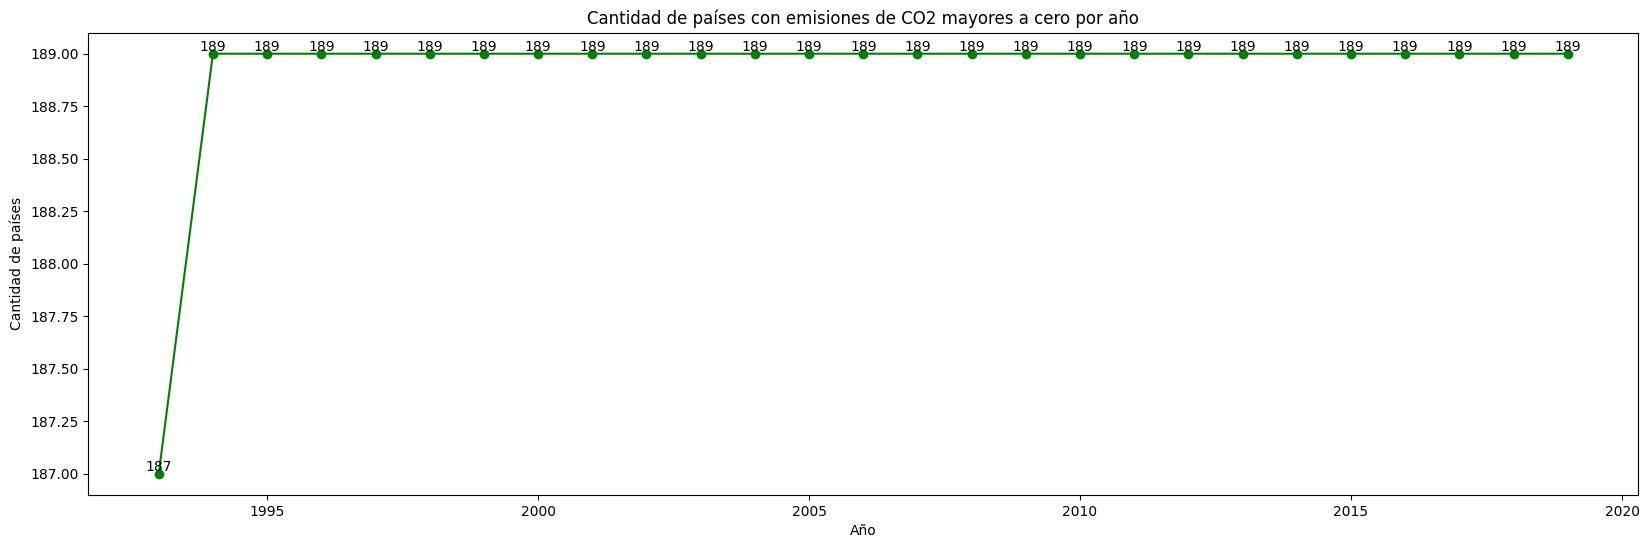

In [281]:
# Configuración del gráfico
plt.figure(figsize=(20, 6))
plt.plot(countries_by_year.index, countries_by_year.values, marker='o', color='green')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de países')
plt.title('Cantidad de países con emisiones de CO2 mayores a cero por año')

# Agregar etiquetas a los puntos del gráfico
for i in range(len(countries_by_year)):
    plt.text(countries_by_year.index[i], countries_by_year.values[i], str(countries_by_year.values[i]),
             ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

<Figure size 1200x600 with 0 Axes>

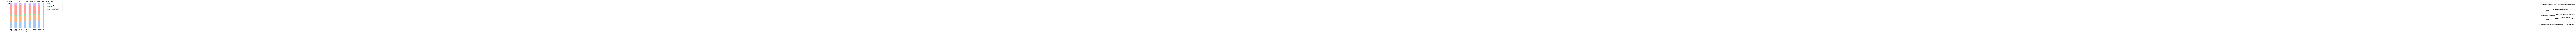

In [282]:
# Filtrar los datos excluyendo "all_energy_types"
df_filtered_1 = dataframe[dataframe['Energy_type'] != 'all_energy_types']

# Agrupar y sumar los valores de Energy_consumption por año y tipo de energía
df_grouped = df_filtered_1.groupby(['Year', 'Energy_type'])['Energy_consumption'].sum().reset_index()

# Crear un DataFrame para almacenar los valores acumulados por año
df_accumulated = df_grouped.pivot('Year', 'Energy_type', 'Energy_consumption').fillna(0)

# Calcular los porcentajes de consumo para cada año
df_percentages = df_accumulated.div(df_accumulated.sum(axis=1), axis=0) * 100

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")

# Crear el gráfico de barras apiladas
df_percentages.plot(kind='bar', stacked=True)

# Agregar etiquetas de porcentaje a las barras
for year in df_percentages.index:
    total = 0
    for col in df_percentages.columns:
        value = df_percentages.loc[year, col]
        plt.text(year, total + value/2, f'{value:.1f}%', ha='center', va='center')
        total += value

# Ajustar leyenda y título
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Evolución del consumo de energía por tipo de energía y año (excluyendo all_energy_types)')

# Mostrar el gráfico
plt.show()

<Figure size 1200x600 with 0 Axes>

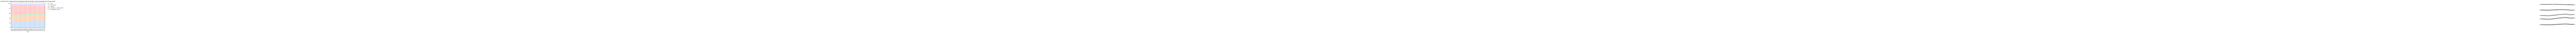

In [283]:
# Filtrar los datos excluyendo "all_energy_types"
df_filtered_1 = dataframe[dataframe['Energy_type'] != 'all_energy_types']

# Agrupar y sumar los valores de Energy_consumption por año y tipo de energía
df_grouped = df_filtered_1.groupby(['Year', 'Energy_type'])['Energy_production'].sum().reset_index()

# Crear un DataFrame para almacenar los valores acumulados por año
df_accumulated = df_grouped.pivot('Year', 'Energy_type', 'Energy_production').fillna(0)

# Calcular los porcentajes de consumo para cada año
df_percentages = df_accumulated.div(df_accumulated.sum(axis=1), axis=0) * 100

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")

# Crear el gráfico de barras apiladas
df_percentages.plot(kind='bar', stacked=True)

# Agregar etiquetas de porcentaje a las barras
for year in df_percentages.index:
    total = 0
    for col in df_percentages.columns:
        value = df_percentages.loc[year, col]
        plt.text(year, total + value/2, f'{value:.1f}%', ha='center', va='center')
        total += value

# Ajustar leyenda y título
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Evolución de la producción de energía por tipo de energía y año (excluyendo all_energy_types)')

# Mostrar el gráfico
plt.show()

In [284]:
# Filtrar el DataFrame para el año 2019 y eliminar la fila del país "World"
# df_filtered = dataframe[(dataframe['Year'] == 2019) & (dataframe['Country'] != 'World')]

# #Obtener el país con el mayor PBI y el país con el menor PBI
# max_gdp_country = df_filtered.loc[df_filtered['GDP'].idxmax(), 'Country']
# min_gdp_country = df_filtered.loc[df_filtered['GDP'].idxmin(), 'Country']

# # Calcular los cuartiles del PBI excluyendo el país con el menor PBI
# quartiles = df_filtered[df_filtered['Country'] != min_gdp_country]['GDP'].quantile([0.25, 0.5, 0.75])

# # Crear la tabla con los resultados
# data = {
#     'Country': [max_gdp_country, min_gdp_country],
#     'Cuartil': ['Max', 'Min'],
#     'PBI': [
#         df_filtered.loc[df_filtered['Country'] == max_gdp_country, 'GDP'].values[0],
#         df_filtered.loc[df_filtered['Country'] == min_gdp_country, 'GDP'].values[0]
#     ]
# }

# # Obtener los países correspondientes a los cuartiles sin duplicados
# quartile_countries = df_filtered[df_filtered['GDP'].isin(quartiles)].groupby('GDP')['Country'].unique().tolist()

# # Agregar los cuartiles y sus países correspondientes a la tabla
# for i, quartile in enumerate(quartiles):
#     data['Country'].append(', '.join(quartile_countries[i]))
#     data['Cuartil'].append(f'{(i+1)*25}%')
#     data['PBI'].append(quartile)

# df_table = pd.DataFrame(data)

# # Mostrar la tabla
# print(df_table)


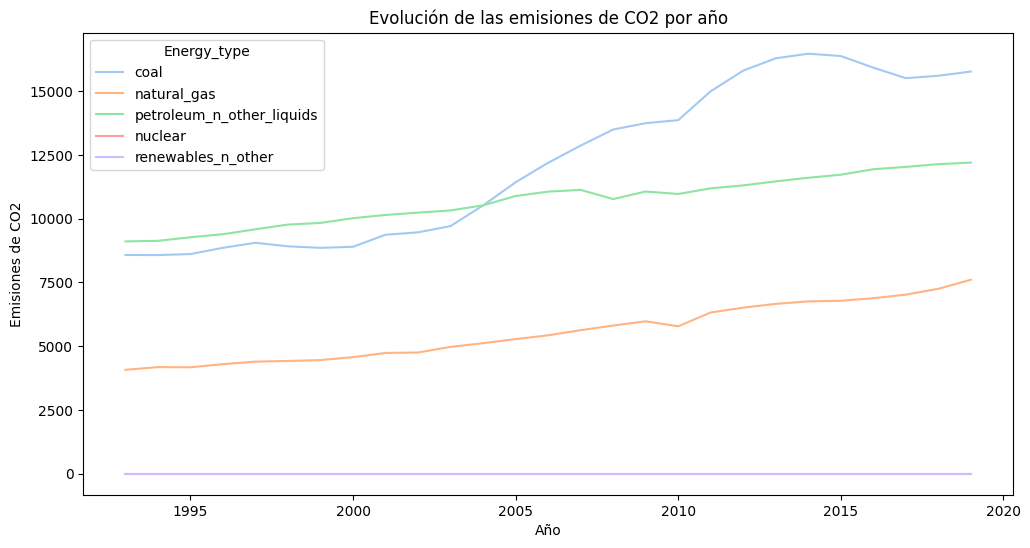

In [285]:
# Filtrar los datos para el tipo de energía "all_energy" y excluir el país "World"
df_filtered6 = dataframe[(dataframe['Energy_type'] != 'all_energy_types') &(dataframe['Country'] == 'World')]

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")

# Crear el gráfico de línea
sns.lineplot(data=df_filtered6, x='Year', y='CO2_emission', hue='Energy_type')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2')
plt.title('Evolución de las emisiones de CO2 por año')

# Mostrar el gráfico
plt.show()

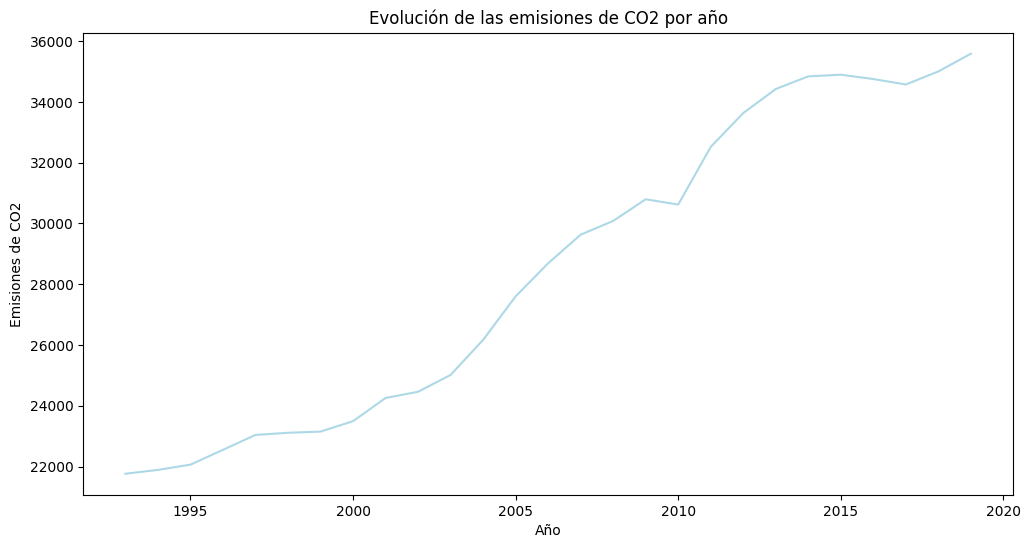

In [286]:
# Filtrar los datos para el tipo de energía "all_energy" y excluir el país "World"
df_filtered6 = dataframe[(dataframe['Energy_type'] == 'all_energy_types') & (dataframe['Country'] == 'World')]

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")

# Crear el gráfico de línea
sns.lineplot(data=df_filtered6, x='Year', y='CO2_emission', color='lightblue')

# Etiquetas y título del gráfico
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2')
plt.title('Evolución de las emisiones de CO2 por año')

# Mostrar el gráfico
plt.show()

In [287]:
# Filtrar el DataFrame para excluir el año 1980
df_filtered_5 = dataframe[dataframe['Year'] != 1980]

# Calcular el porcentaje de valores nulos por columna
null_percentage = (df_filtered_5.isnull().sum() / len(df_filtered)) * 100

# Mostrar el porcentaje de valores nulos por columna
print(null_percentage)


Country                        0.000000
Energy_type                    0.000000
Year                           0.000000
Energy_consumption             0.000000
Energy_production              0.000000
GDP                            0.211589
Population                     0.000000
Energy_intensity_per_capita    0.000000
Energy_intensity_by_GDP        0.000000
CO2_emission                   0.000000
dtype: float64


In [288]:
# Filtrar el DataFrame para excluir el año 1980
df_filtered = dataframe[dataframe['Year'] != 1980]

# Filtrar los valores nulos en la columna "CO2_emission"
null_co2_values = df_filtered[df_filtered['CO2_emission'].isnull()]

# Obtener el listado de países con valores nulos en CO2_emission
countries_with_null_co2 = null_co2_values['Country'].unique()

# Crear un DataFrame con los países y los valores nulos en CO2_emission
df_countries_with_null_co2 = pd.DataFrame({'Country': countries_with_null_co2})

# Mostrar el DataFrame
print(df_countries_with_null_co2)


Empty DataFrame
Columns: [Country]
Index: []


In [289]:
dataframe['Energy_type'].value_counts().sort_values(ascending = False)


nuclear                      5130
renewables_n_other           5130
all_energy_types             5128
coal                         5128
natural_gas                  5103
petroleum_n_other_liquids    5101
Name: Energy_type, dtype: int64

In [290]:
dataframe['Country'].value_counts().sort_values(ascending = False)

World                       162
Austria                     162
Azerbaijan                  162
Albania                     162
Algeria                     162
                           ... 
Venezuela                   162
Vietnam                     162
Slovakia                    158
Czech Republic              158
Northern Mariana Islands    110
Name: Country, Length: 190, dtype: int64

##TOP 10 PAISES

In [291]:
df_filtered_w_2018 = dataframe[(dataframe['Energy_type'] == 'all_energy_types') & (dataframe['Country'] == 'World') & (dataframe['Year'] == 2018)]
df_filtered_w_2018.head()

Country       Energy_type  Year  Energy_consumption  Energy_production  \
52668   World  all_energy_types  2018          597.736582          600.72873   

                 GDP    Population  Energy_intensity_per_capita  \
52668  124161.994035  7.632247e+06                    78.317248   

       Energy_intensity_by_GDP  CO2_emission  
52668                 4.814167  35002.900777

In [292]:
year = 2018
country = 'World'
Energy_type = 'all_energy_types'

df_filtered_0 = dataframe[(dataframe['Year'] == year) & (dataframe['Country'] != country)& (dataframe['Energy_type'] == Energy_type) ]
df_pivot = df_filtered_0.pivot_table(index='Country', values='CO2_emission', aggfunc='sum')

# Ordena la tabla pivot en orden ascendente
df_pivot_sorted = df_pivot.sort_values(by='CO2_emission', ascending=False)

top_10_countries = df_pivot_sorted.head(10)

print(top_10_countries)

               CO2_emission
Country                    
China          10414.766208
United States   5131.080980
India           2199.569242
Russia          1733.861881
Japan           1172.189197
Germany          805.059275
South Korea      688.355816
Iran             615.797113
Canada           601.402387
Saudi Arabia     584.231904


In [293]:
dataframe.head()

Country                Energy_type  Year  Energy_consumption  \
18018   World           all_energy_types  1993          355.676348   
18019   World                       coal  1993           90.358089   
18020   World                natural_gas  1993           79.110242   
18021   World  petroleum_n_other_liquids  1993          136.158710   
18022   World                    nuclear  1993           22.008422   

       Energy_production           GDP    Population  \
18018         354.594327  52108.495098  5.581569e+06   
18019          89.794006  52108.495098  5.581569e+06   
18020          78.261716  52108.495098  5.581569e+06   
18021         136.166179  52108.495098  5.581569e+06   
18022          22.008422  52108.495098  5.581569e+06   

       Energy_intensity_per_capita  Energy_intensity_by_GDP  CO2_emission  
18018                    63.723367                 6.825688  21766.142147  
18019                    63.723367                 6.825688   8579.464301  
18020                    63.723367                 6.825688   4075.491754  
18021                    63.723367                 6.825688   9111.186091  
18022                    63.723367                 6.825688      0.000000

In [294]:
year_1 = 1993
country = 'World'
Energy_type = 'all_energy_types'

df_filtered_1 = dataframe[(dataframe['Year'] == year_1) & (dataframe['Country'] != country)& (dataframe['Energy_type'] == Energy_type) ]
df_pivot_1 = df_filtered_1.pivot_table(index='Country', values='CO2_emission', aggfunc='sum')

# Ordena la tabla pivot en orden ascendente
df_pivot_sorted_1 = df_pivot_1.sort_values(by='CO2_emission', ascending=False)

top_20_countries_1 = df_pivot_sorted_1.head(20)

print(top_20_countries_1)

                CO2_emission
Country                     
United States    5093.879398
China            2541.080385
Russia           2206.984323
Japan            1133.122612
Germany           953.165273
India             604.997766
United Kingdom    596.731568
Ukraine           594.182350
Canada            448.628648
Italy             423.349856
France            400.250884
Kazakhstan        359.641181
Poland            344.130648
South Africa      328.635756
South Korea       310.348615
Mexico            295.450093
Australia         284.808418
Spain             253.783491
Brazil            243.906254
Iran              214.123017


In [295]:
top_20_countries_list_1 = top_20_countries_1.index.tolist()

print(top_20_countries_list_1)

['United States', 'China', 'Russia', 'Japan', 'Germany', 'India', 'United Kingdom', 'Ukraine', 'Canada', 'Italy', 'France', 'Kazakhstan', 'Poland', 'South Africa', 'South Korea', 'Mexico', 'Australia', 'Spain', 'Brazil', 'Iran']


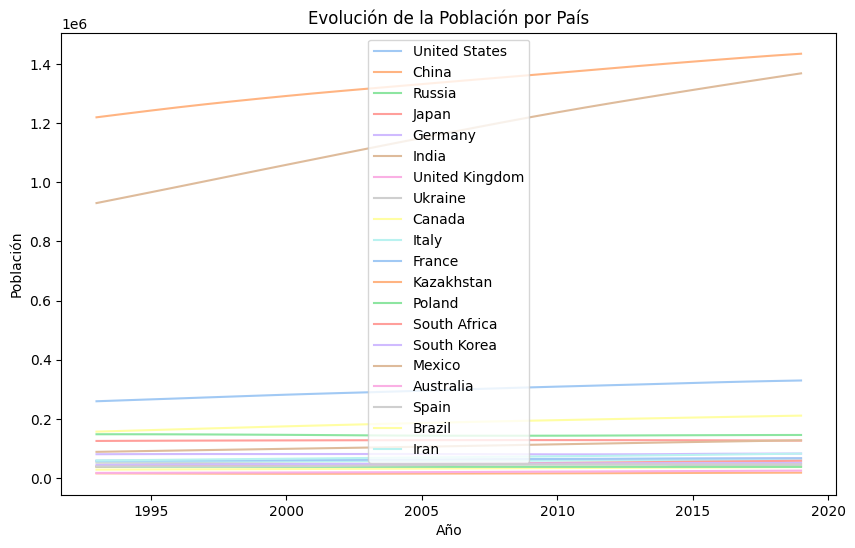

In [296]:
top_20_countries_list = top_20_countries_list_1
# Filtra los datos para los países seleccionados y la columna de población
df_filtered = dataframe[ (dataframe['Energy_type'] == Energy_type) ]

# Crea el gráfico de línea para mostrar la evolución de la población por país
plt.figure(figsize=(10, 6))

for country in top_20_countries_list:
    df_country = df_filtered[df_filtered['Country'] == country]
    plt.plot(df_country['Year'], df_country['Population'], label=country)

plt.title('Evolución de la Población por País')
plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()

plt.show()

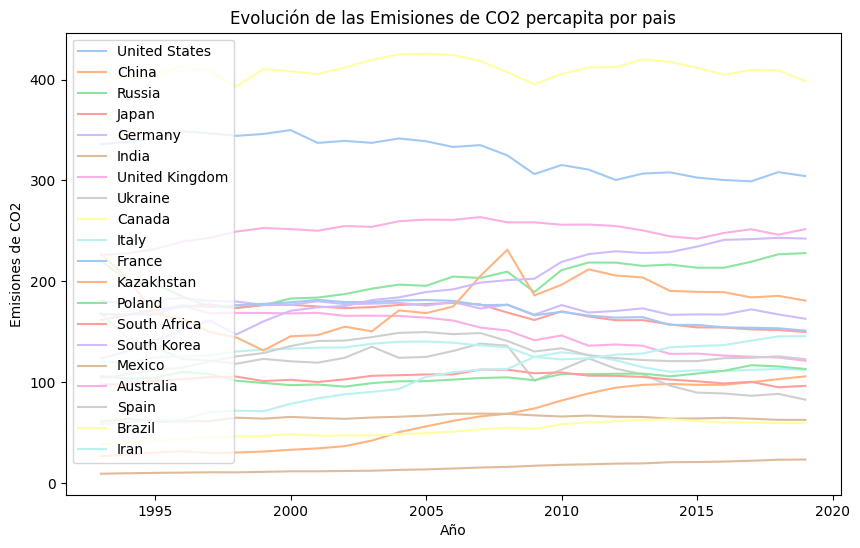

In [297]:
plt.figure(figsize=(10, 6))

for country in top_20_countries_list:
    df_country = df_filtered[df_filtered['Country'] == country]
    plt.plot(df_country['Year'], df_country['Energy_intensity_per_capita'], label=country)

plt.title('Evolución de las Emisiones de CO2 percapita por pais')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2')
plt.legend()

plt.show()

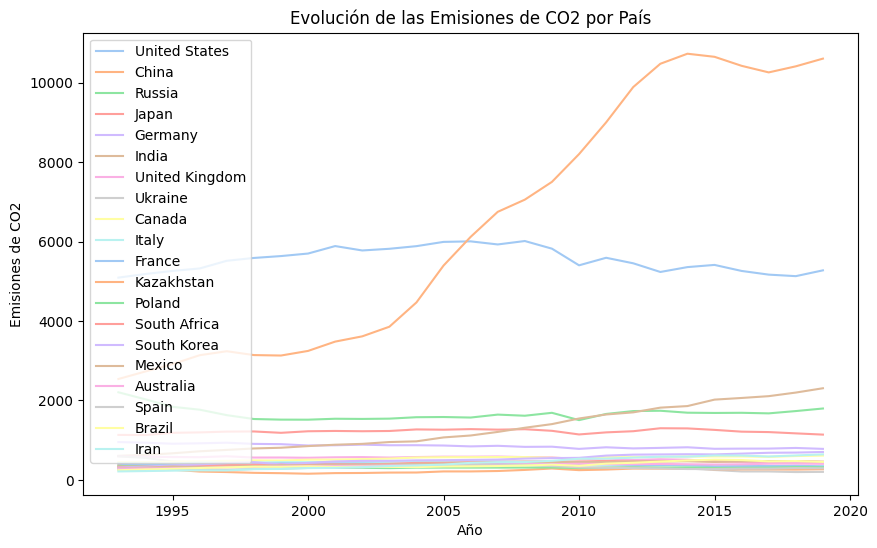

In [298]:
plt.figure(figsize=(10, 6))

for country in top_20_countries_list:
    df_country = df_filtered[df_filtered['Country'] == country]
    plt.plot(df_country['Year'], df_country['CO2_emission'], label=country)

plt.title('Evolución de las Emisiones de CO2 por País')
plt.xlabel('Año')
plt.ylabel('Emisiones de CO2')
plt.legend()

plt.show()

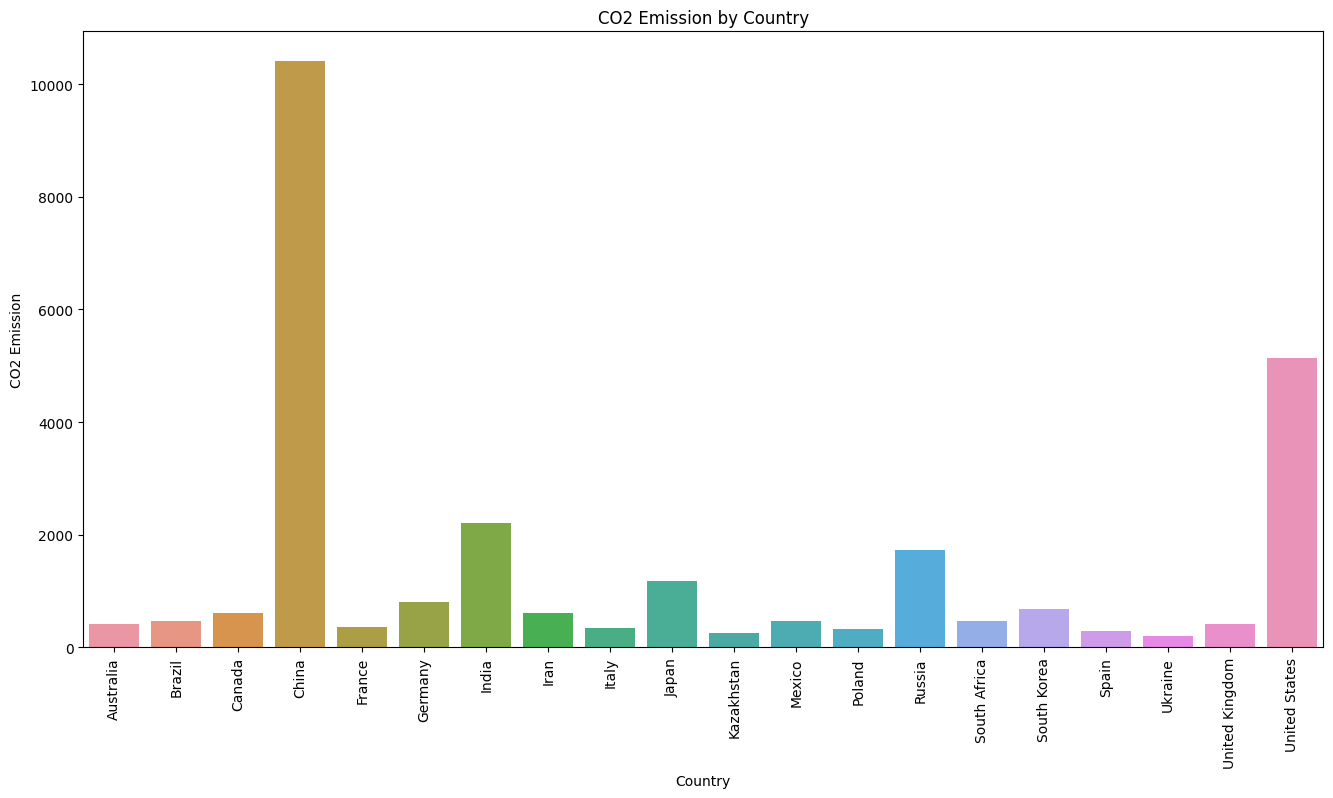

In [299]:
df_filtered_top = df_filtered_0[df_filtered_0['Country'].isin(top_20_countries_list)]

plt.figure(figsize=(16, 8))  # Ajusta el tamaño de la figura

sns.barplot(x="Country", y="CO2_emission", data=df_filtered_top)
for index, row in df_filtered_top.iterrows():
    plt.annotate(f"{row['CO2_emission']:.2f}", (index, row['CO2_emission']), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel("Country")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission by Country")

plt.show()


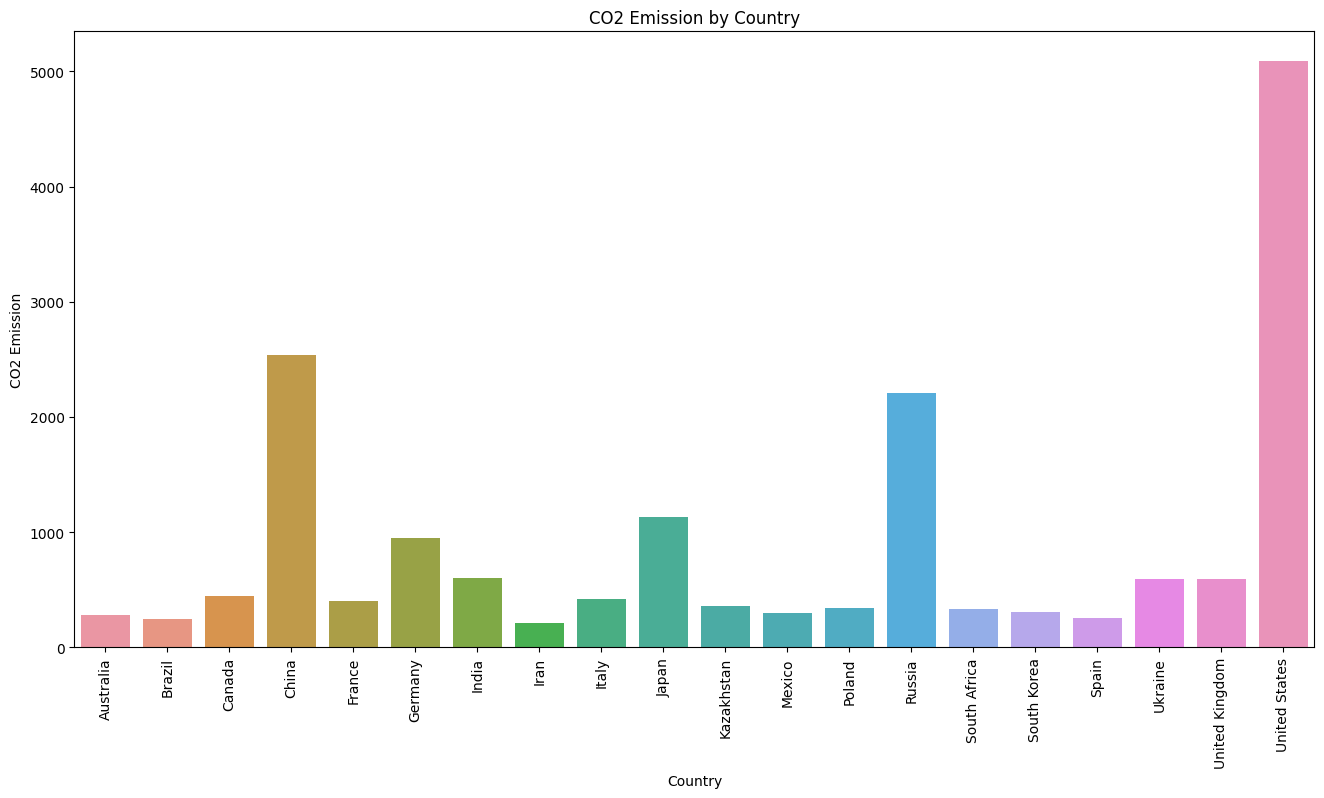

In [300]:
df_filtered_top_1 = df_filtered_1[df_filtered_1['Country'].isin(top_20_countries_list_1)]

plt.figure(figsize=(16, 8))  # Ajusta el tamaño de la figura

sns.barplot(x="Country", y="CO2_emission", data=df_filtered_top_1)
for index, row in df_filtered_top_1.iterrows():
    plt.annotate(f"{row['CO2_emission']:.2f}", (index, row['CO2_emission']), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad
plt.xlabel("Country")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission by Country")

plt.show()

## Comparación paises

In [301]:
df_china = dataframe.loc[dataframe['Country'] == 'China']

In [302]:
df_china.head()

Country                Energy_type  Year  Energy_consumption  \
18264   China           all_energy_types  1993           32.380117   
18265   China                       coal  1993           23.992714   
18266   China                natural_gas  1993            0.622635   
18267   China  petroleum_n_other_liquids  1993            6.256998   
18268   China                    nuclear  1993            0.025211   

       Energy_production       GDP  Population  Energy_intensity_per_capita  \
18264          34.049883  2364.808   1219575.0                    26.550329   
18265          25.642694  2364.808   1219575.0                    26.550329   
18266           0.642638  2364.808   1219575.0                    26.550329   
18267           6.201041  2364.808   1219575.0                    26.550329   
18268           0.025211  2364.808   1219575.0                    26.550329   

       Energy_intensity_by_GDP  CO2_emission  
18264                13.692493   2541.080385  
18265                13.692493   2134.521878  
18266                13.692493     31.558507  
18267                13.692493    375.000000  
18268                13.692493      0.000000

In [303]:
corr_matrix = df_china.corr()

In [304]:
corr_matrix['Energy_consumption'].sort_values(ascending = False)

Energy_consumption             1.000000
Energy_production              0.990727
CO2_emission                   0.987473
Energy_intensity_per_capita    0.368919
Year                           0.360701
GDP                            0.360036
Population                     0.356601
Energy_intensity_by_GDP       -0.293647
Name: Energy_consumption, dtype: float64

array([[<Axes: xlabel='Energy_consumption', ylabel='Energy_consumption'>,
        <Axes: xlabel='CO2_emission', ylabel='Energy_consumption'>,
        <Axes: xlabel='Energy_production', ylabel='Energy_consumption'>,
        <Axes: xlabel='Population', ylabel='Energy_consumption'>],
       [<Axes: xlabel='Energy_consumption', ylabel='CO2_emission'>,
        <Axes: xlabel='CO2_emission', ylabel='CO2_emission'>,
        <Axes: xlabel='Energy_production', ylabel='CO2_emission'>,
        <Axes: xlabel='Population', ylabel='CO2_emission'>],
       [<Axes: xlabel='Energy_consumption', ylabel='Energy_production'>,
        <Axes: xlabel='CO2_emission', ylabel='Energy_production'>,
        <Axes: xlabel='Energy_production', ylabel='Energy_production'>,
        <Axes: xlabel='Population', ylabel='Energy_production'>],
       [<Axes: xlabel='Energy_consumption', ylabel='Population'>,
        <Axes: xlabel='CO2_emission', ylabel='Population'>,
        <Axes: xlabel='Energy_production', ylabel='Popul

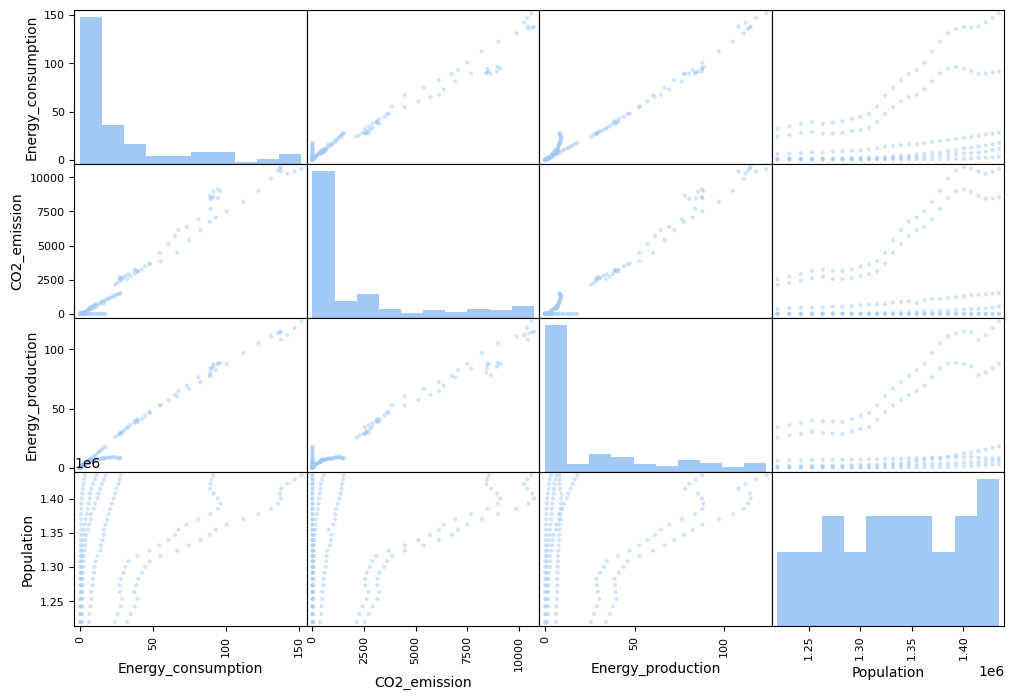

In [305]:
cols = ['Energy_consumption','CO2_emission', 'Energy_production', 'Population']
scatter_matrix(df_china[cols], figsize=(12, 8))

United State

In [306]:
df_usa = dataframe.loc[dataframe['Country'] == 'United States']

In [307]:
df_usa.head()

Country                Energy_type  Year  Energy_consumption  \
19338  United States           all_energy_types  1993           87.265888   
19339  United States                       coal  1993           19.835148   
19340  United States                natural_gas  1993           21.229000   
19341  United States  petroleum_n_other_liquids  1993           33.685258   
19342  United States                    nuclear  1993            6.410499   

       Energy_production       GDP  Population  Energy_intensity_per_capita  \
19338          68.272678  10424.87    259809.5                   335.884129   
19339          20.335654  10424.87    259809.5                   335.884129   
19340          18.584037  10424.87    259809.5                   335.884129   
19341          16.860579  10424.87    259809.5                   335.884129   
19342           6.410499  10424.87    259809.5                   335.884129   

       Energy_intensity_by_GDP  CO2_emission  
19338                 8.370933   5093.879398  
19339                 8.370933   1821.880293  
19340                 8.370933   1083.261526  
19341                 8.370933   2188.737579  
19342                 8.370933      0.000000

In [308]:
corr_matrix_usa = df_usa.corr()

In [309]:
corr_matrix_usa['Energy_consumption'].sort_values(ascending = False)

Energy_consumption             1.000000
CO2_emission                   0.972691
Energy_production              0.959014
GDP                            0.029230
Population                     0.026806
Year                           0.026080
Energy_intensity_per_capita   -0.011115
Energy_intensity_by_GDP       -0.027737
Name: Energy_consumption, dtype: float64

array([[<Axes: xlabel='Energy_consumption', ylabel='Energy_consumption'>,
        <Axes: xlabel='CO2_emission', ylabel='Energy_consumption'>,
        <Axes: xlabel='Energy_production', ylabel='Energy_consumption'>,
        <Axes: xlabel='Population', ylabel='Energy_consumption'>],
       [<Axes: xlabel='Energy_consumption', ylabel='CO2_emission'>,
        <Axes: xlabel='CO2_emission', ylabel='CO2_emission'>,
        <Axes: xlabel='Energy_production', ylabel='CO2_emission'>,
        <Axes: xlabel='Population', ylabel='CO2_emission'>],
       [<Axes: xlabel='Energy_consumption', ylabel='Energy_production'>,
        <Axes: xlabel='CO2_emission', ylabel='Energy_production'>,
        <Axes: xlabel='Energy_production', ylabel='Energy_production'>,
        <Axes: xlabel='Population', ylabel='Energy_production'>],
       [<Axes: xlabel='Energy_consumption', ylabel='Population'>,
        <Axes: xlabel='CO2_emission', ylabel='Population'>,
        <Axes: xlabel='Energy_production', ylabel='Popul

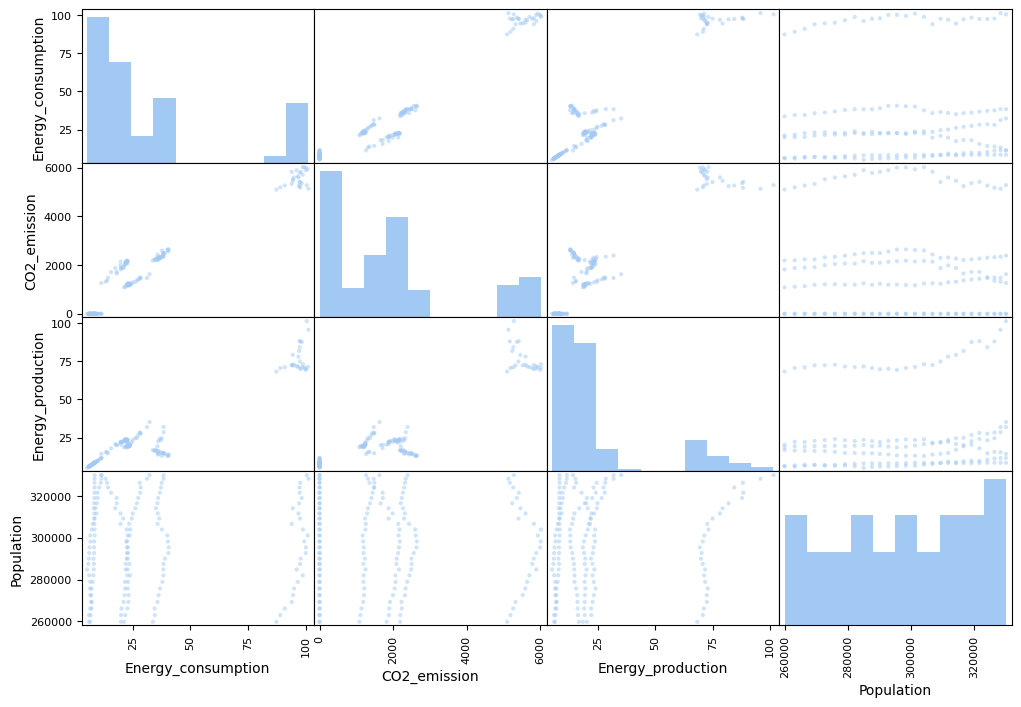

In [310]:
scatter_matrix(df_usa[cols], figsize=(12, 8))

Noruega


In [311]:
df_norway = dataframe.loc[dataframe['Country'] == 'Norway']

In [312]:
df_norway.head()

Country                Energy_type  Year  Energy_consumption  \
18948  Norway           all_energy_types  1993            1.715268   
18949  Norway                       coal  1993            0.020544   
18950  Norway                natural_gas  1993            0.098965   
18951  Norway  petroleum_n_other_liquids  1993            0.389518   
18952  Norway                    nuclear  1993            0.000000   

       Energy_production       GDP  Population  Energy_intensity_per_capita  \
18948           7.120681  188.1799    4315.195                   397.494867   
18949           0.007513  188.1799    4315.195                   397.494867   
18950           1.062651  188.1799    4315.195                   397.494867   
18951           4.830828  188.1799    4315.195                   397.494867   
18952           0.000000  188.1799    4315.195                   397.494867   

       Energy_intensity_by_GDP  CO2_emission  
18948                 9.115043     35.126149  
18949                 9.115043      3.243906  
18950                 9.115043      7.573319  
18951                 9.115043     24.308924  
18952                 9.115043      0.000000

In [313]:
corr_matrix_norway = df_norway.corr()

In [314]:
corr_matrix_norway['Energy_consumption'].sort_values(ascending = False)

Energy_consumption             1.000000
Energy_production              0.715206
CO2_emission                   0.607497
GDP                            0.025321
Year                           0.021906
Population                     0.018454
Energy_intensity_per_capita    0.010594
Energy_intensity_by_GDP       -0.017945
Name: Energy_consumption, dtype: float64

array([[<Axes: xlabel='Energy_consumption', ylabel='Energy_consumption'>,
        <Axes: xlabel='CO2_emission', ylabel='Energy_consumption'>,
        <Axes: xlabel='Energy_production', ylabel='Energy_consumption'>,
        <Axes: xlabel='Population', ylabel='Energy_consumption'>],
       [<Axes: xlabel='Energy_consumption', ylabel='CO2_emission'>,
        <Axes: xlabel='CO2_emission', ylabel='CO2_emission'>,
        <Axes: xlabel='Energy_production', ylabel='CO2_emission'>,
        <Axes: xlabel='Population', ylabel='CO2_emission'>],
       [<Axes: xlabel='Energy_consumption', ylabel='Energy_production'>,
        <Axes: xlabel='CO2_emission', ylabel='Energy_production'>,
        <Axes: xlabel='Energy_production', ylabel='Energy_production'>,
        <Axes: xlabel='Population', ylabel='Energy_production'>],
       [<Axes: xlabel='Energy_consumption', ylabel='Population'>,
        <Axes: xlabel='CO2_emission', ylabel='Population'>,
        <Axes: xlabel='Energy_production', ylabel='Popul

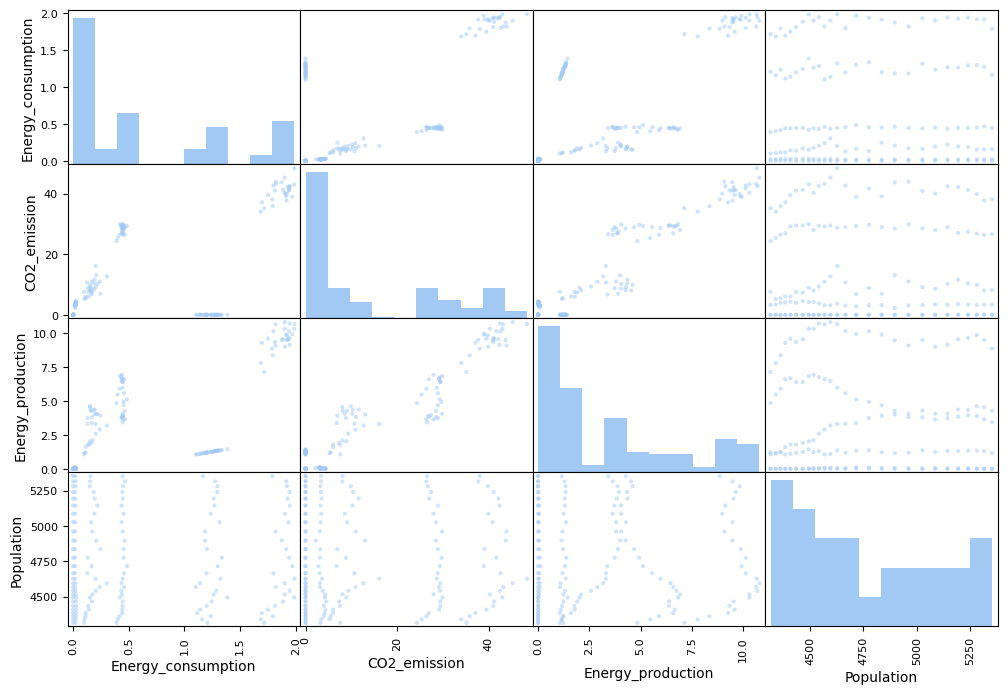

In [315]:
scatter_matrix(df_norway[cols], figsize=(12, 8))

## Analisis de variables


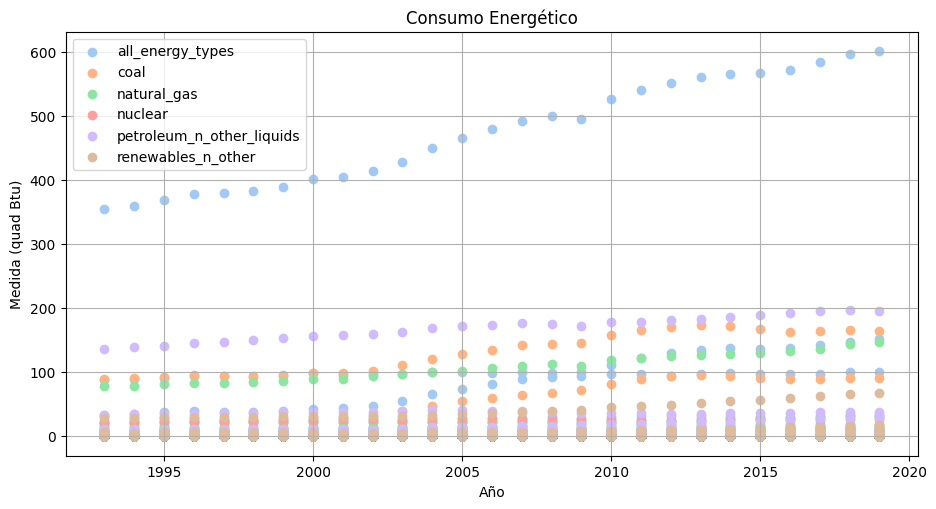

In [316]:
f, axes = plt.subplots(1, 1, figsize=(11, 5.5))

for a, (b, c) in enumerate(dataframe.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_consumption, label=b)

axes.legend()
axes.grid(True)
plt.title('Consumo Energético')
plt.xlabel('Año')
plt.ylabel('Medida (quad Btu)')
plt.show()

In [317]:
corr = dataframe.corr()

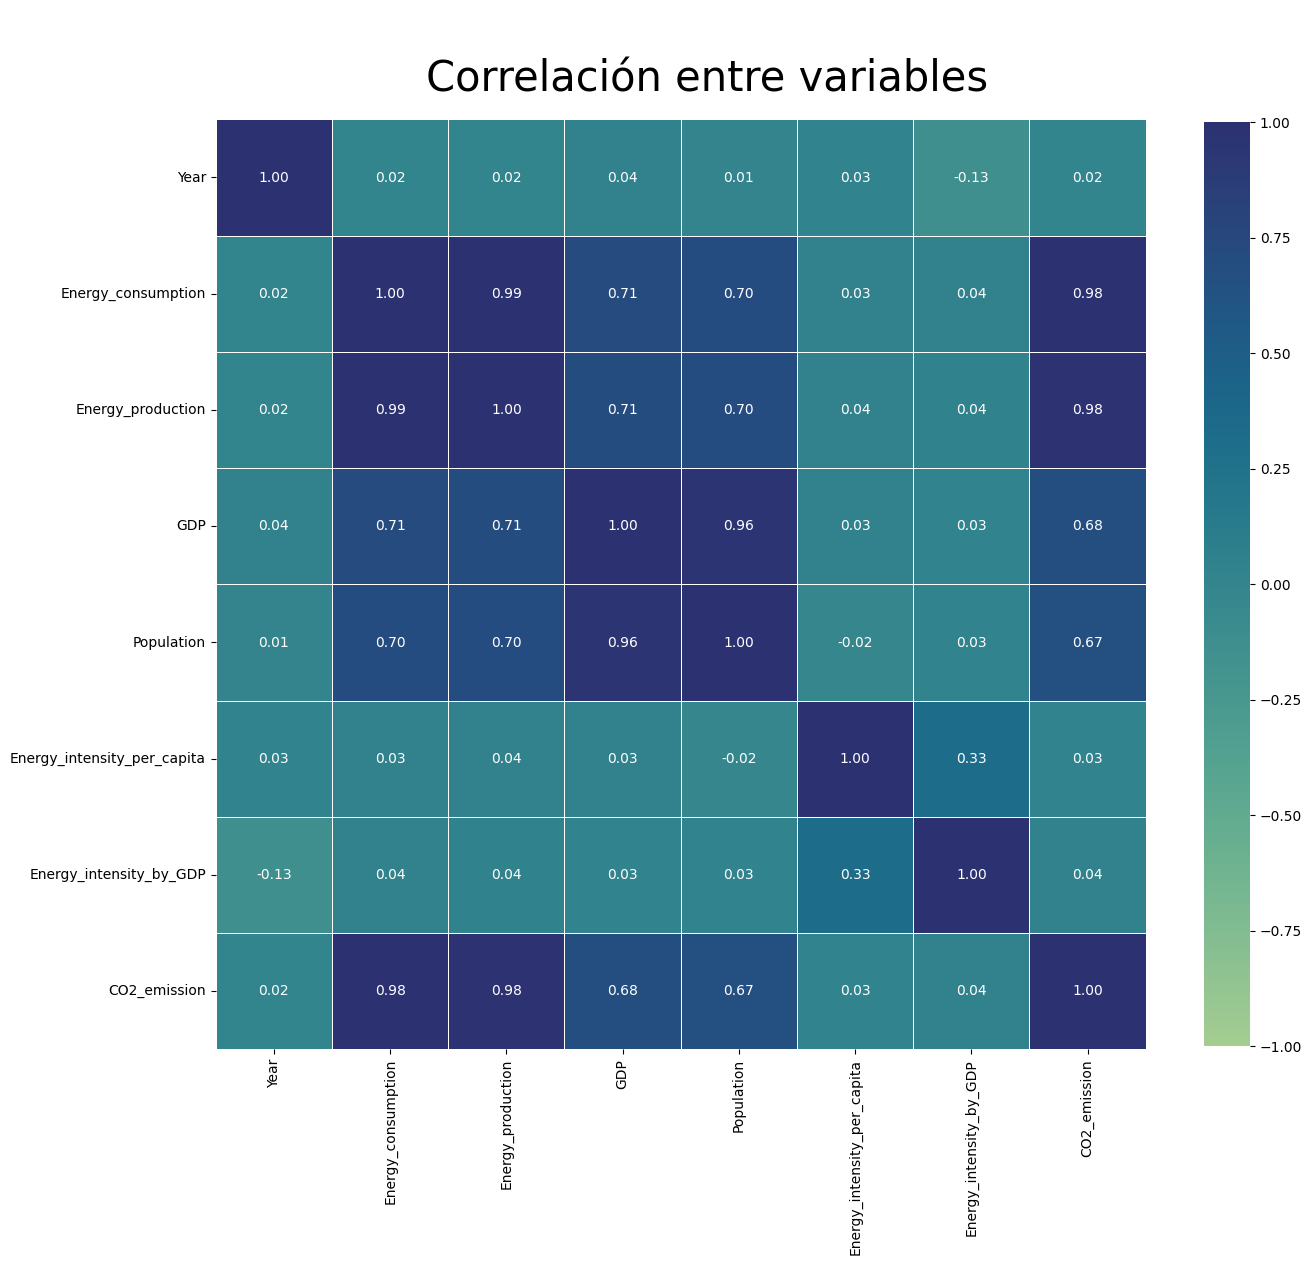

In [318]:
f, ax = plt.subplots(figsize=(15, 15))
plt.title('\n    Correlación entre variables', pad=20, size=30)
ax = sns.heatmap(corr, annot=True,
                 fmt=".2f",
                 vmin=-1, vmax=1,
                 center=0, square=True, linewidths=.5,cmap="crest",
                 cbar_kws={"shrink": 0.8})

#Imputacion de datos

<Axes: >

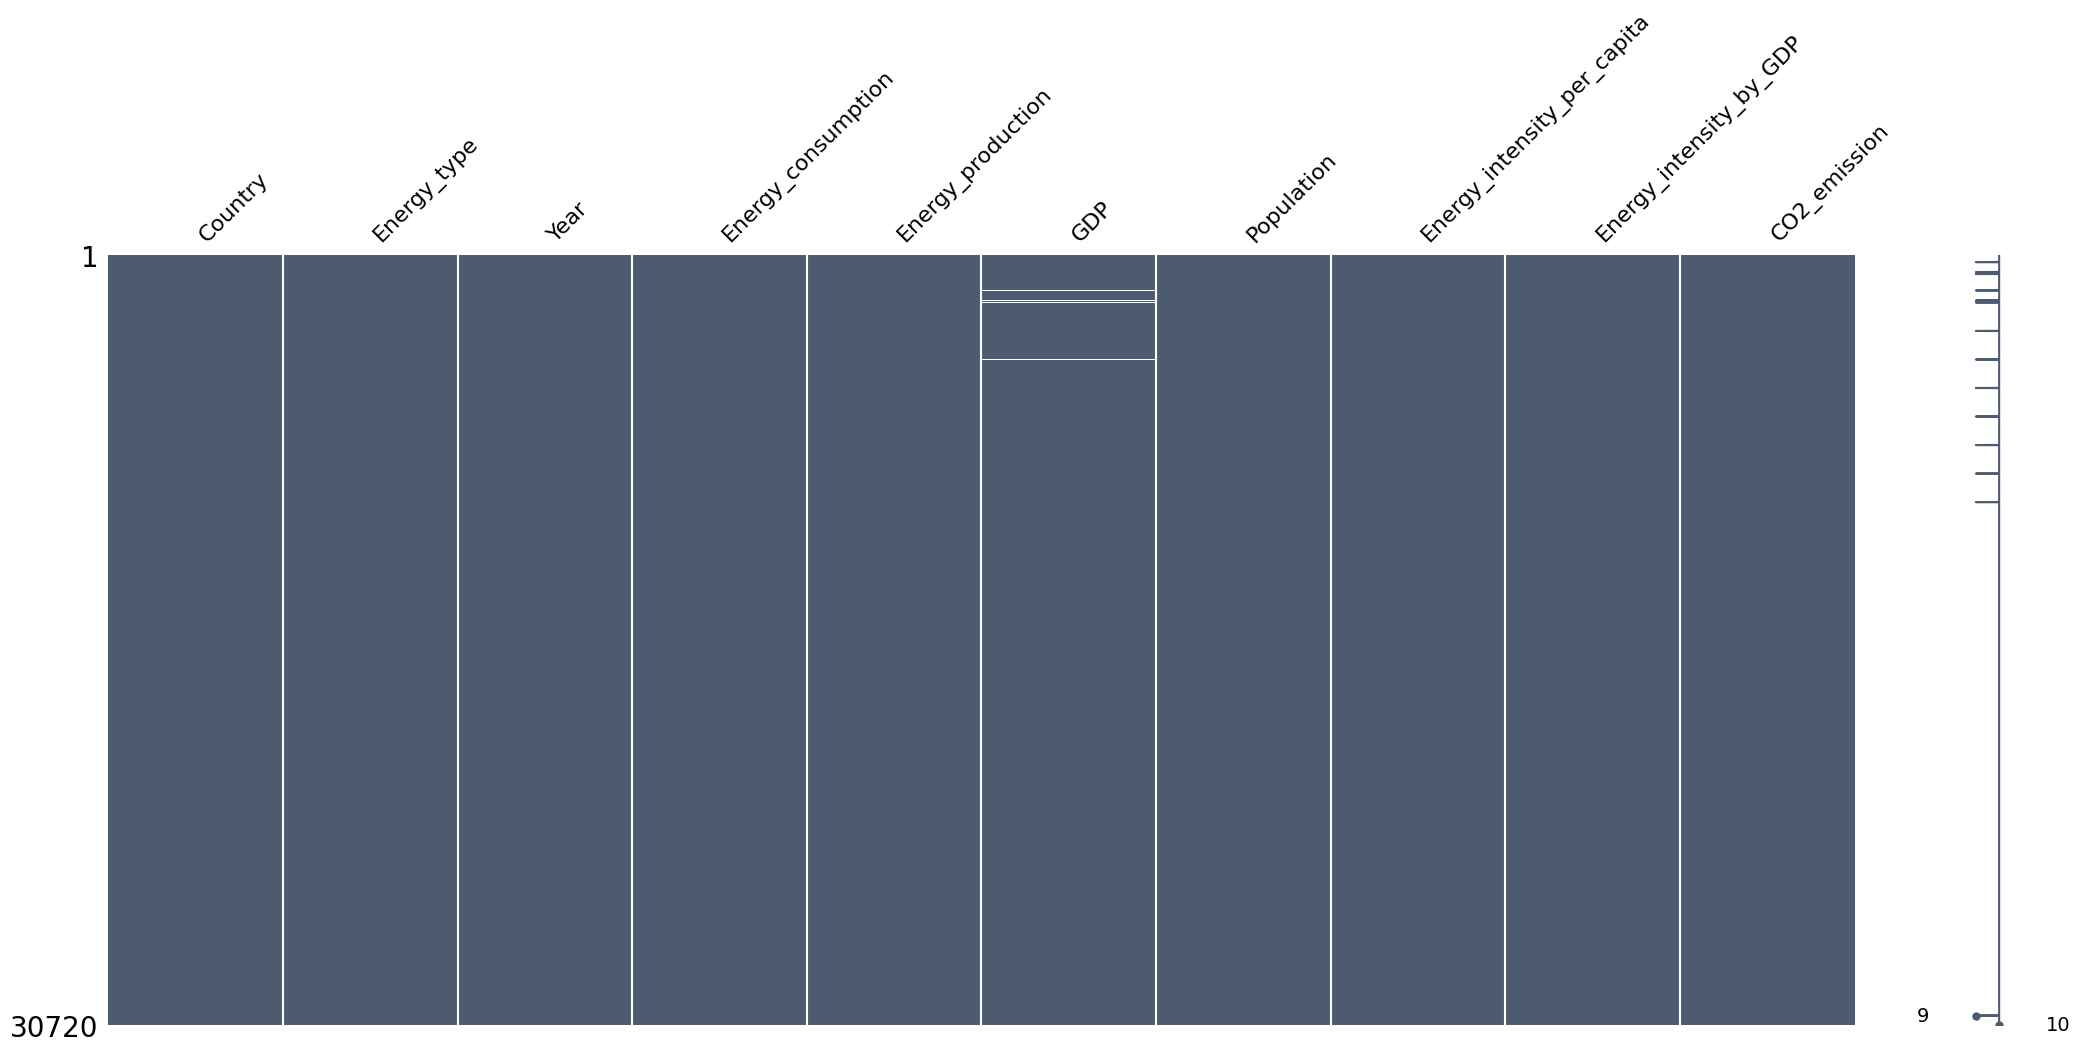

In [319]:
msno.matrix(dataframe,color=(0.3,0.36,0.44))

In [320]:
from sklearn.impute import KNNImputer

# One hot encoding the categorical variables for now
cat_vars = dataframe[['Country', 'Energy_type', 'Year']]
cat_dummies = pd.get_dummies(cat_vars, drop_first=True)


# Creating Temporary dataset
temp_m = dataframe.drop(['Country', 'Energy_type', 'Year'], axis=1)
temp_m = pd.concat([cat_dummies, temp_m], axis=1)

In [321]:
# KNN Imputer
imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

# Attaching the Imputer to dataset
temp_m = imputer.fit_transform(temp_m)
temp_m = pd.DataFrame(temp_m)

temp_m.head()

0    1    2    3    4    5    6    7    8    9    ...  192  193  194  \
0  1993.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  1993.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  1993.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  1993.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
4  1993.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   

          195         196           197           198        199       200  \
0  355.676348  354.594327  52108.495098  5.581569e+06  63.723367  6.825688   
1   90.358089   89.794006  52108.495098  5.581569e+06  63.723367  6.825688   
2   79.110242   78.261716  52108.495098  5.581569e+06  63.723367  6.825688   
3  136.158710  136.166179  52108.495098  5.581569e+06  63.723367  6.825688   
4   22.008422   22.008422  52108.495098  5.581569e+06  63.723367  6.825688   

            201  
0  21766.142147  
1   8579.464301  
2   4075.491754  
3   9111.186091  
4      0.000000  

[5 rows x 202 columns]

In [322]:
# Removing the encoded data from the temp_data dataset
cut_data = temp_m.iloc[:,214:]

# Removing the section of data im going to replace from the original dataset df
columns = dataframe.columns
original_data = dataframe.iloc[:,:10].reset_index(drop=True)

# Merging the two
#temp = pd.concat([original_data, temp_data], axis=1).drop('index', 1).set_axis(columns, axis=1, inplace=False)
dataframe = pd.concat([original_data, cut_data], axis=1).reset_index(drop=True).set_axis(columns, axis=1, inplace=False)

In [323]:
for var in dataframe:
    print(f'{var}: {dataframe[var].isnull().sum()}')

Country: 0
Energy_type: 0
Year: 0
Energy_consumption: 0
Energy_production: 0
GDP: 65
Population: 0
Energy_intensity_per_capita: 0
Energy_intensity_by_GDP: 0
CO2_emission: 0


<Axes: >

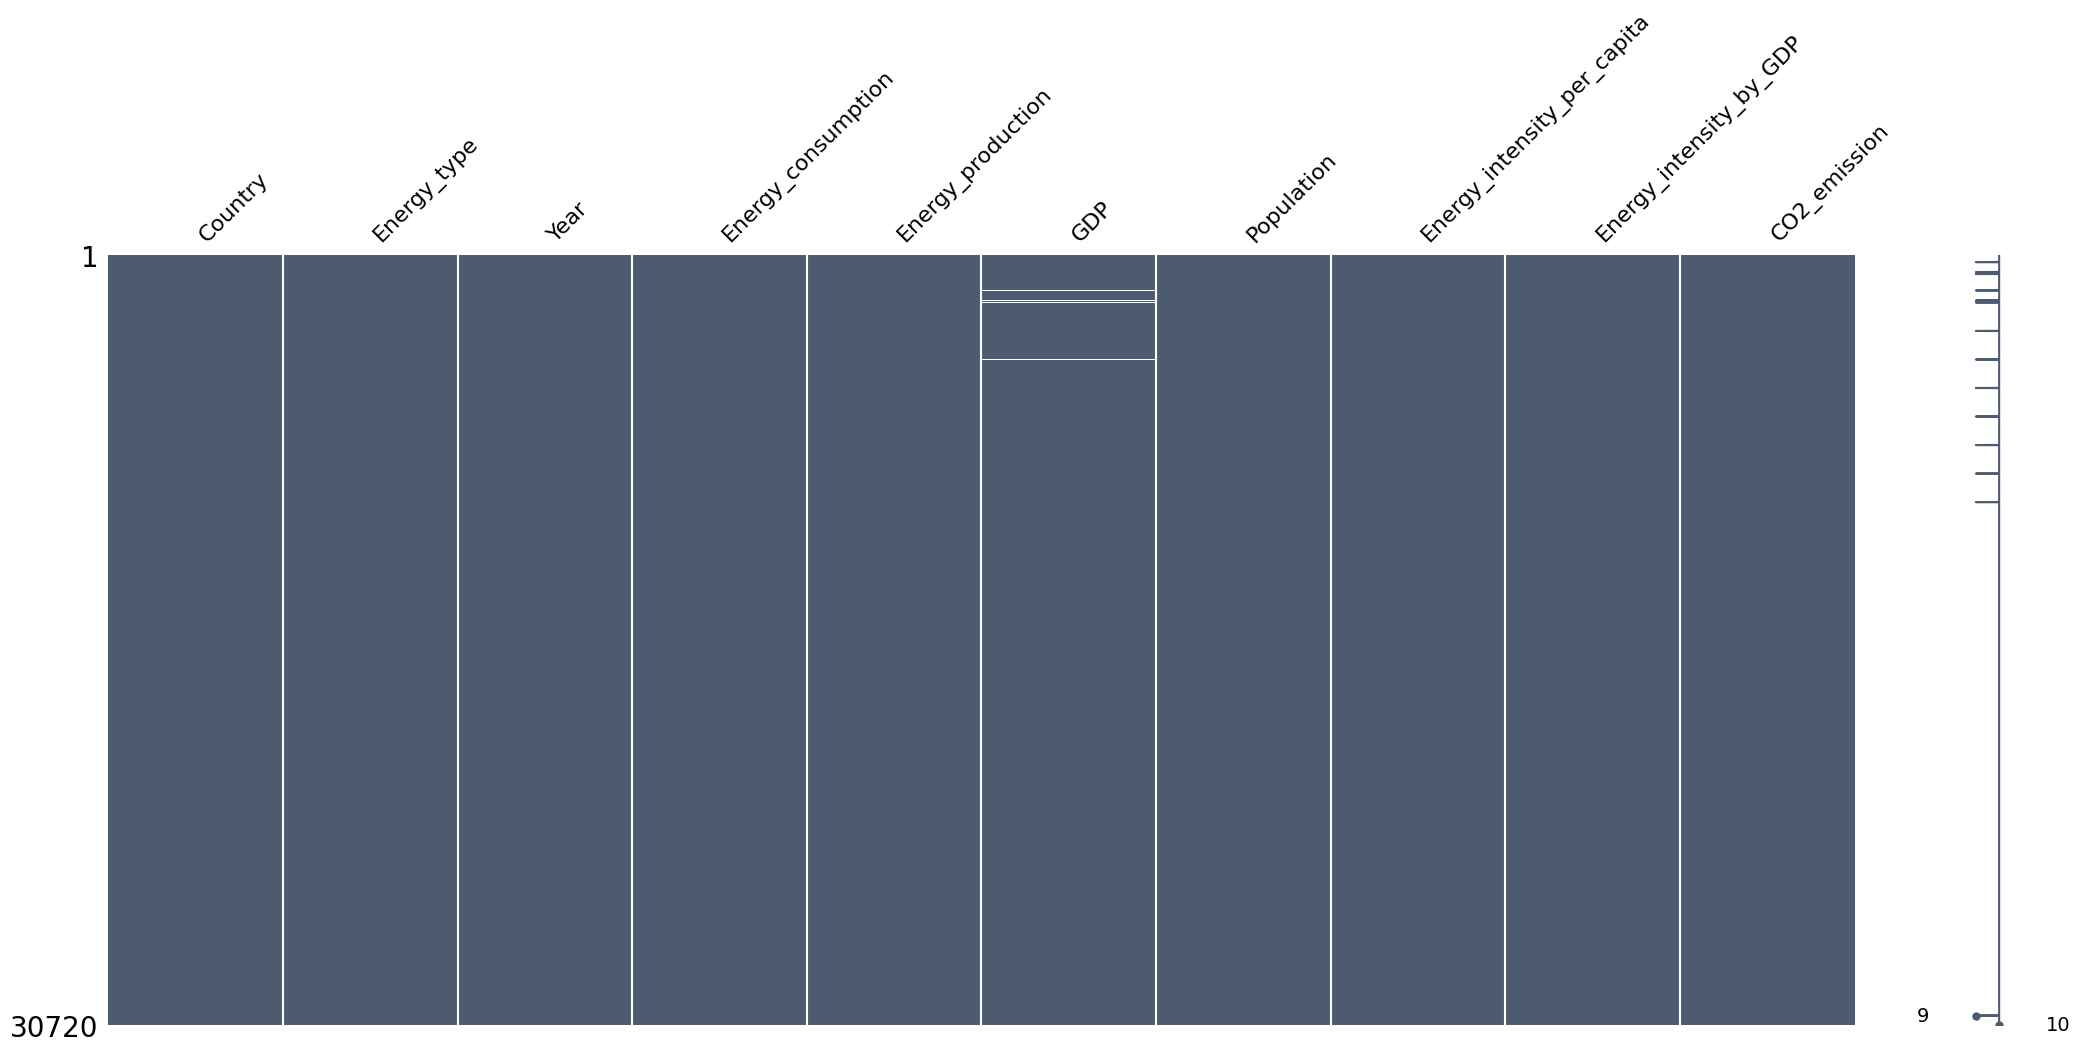

In [324]:
msno.matrix(dataframe,color=(0.3,0.36,0.44))

In [325]:
# Suponiendo que "GDP" es la columna donde deseas verificar los valores nulos
columna_gdp = 'GDP'

# Filtrar solo las filas con valores nulos en la columna "GDP"
valores_nulos = dataframe[dataframe[columna_gdp].isnull()]

# Agrupar los valores nulos por países y contar la cantidad de valores nulos por país
valores_nulos_por_pais = valores_nulos.groupby('Country')[columna_gdp].count()

# Imprimir los valores nulos por países
print(valores_nulos_por_pais)

Country
Cyprus                      0
Moldova                     0
Northern Mariana Islands    0
Name: GDP, dtype: int64


In [326]:
dataframe.dropna(subset=[columna_gdp], inplace=True)

<Axes: >

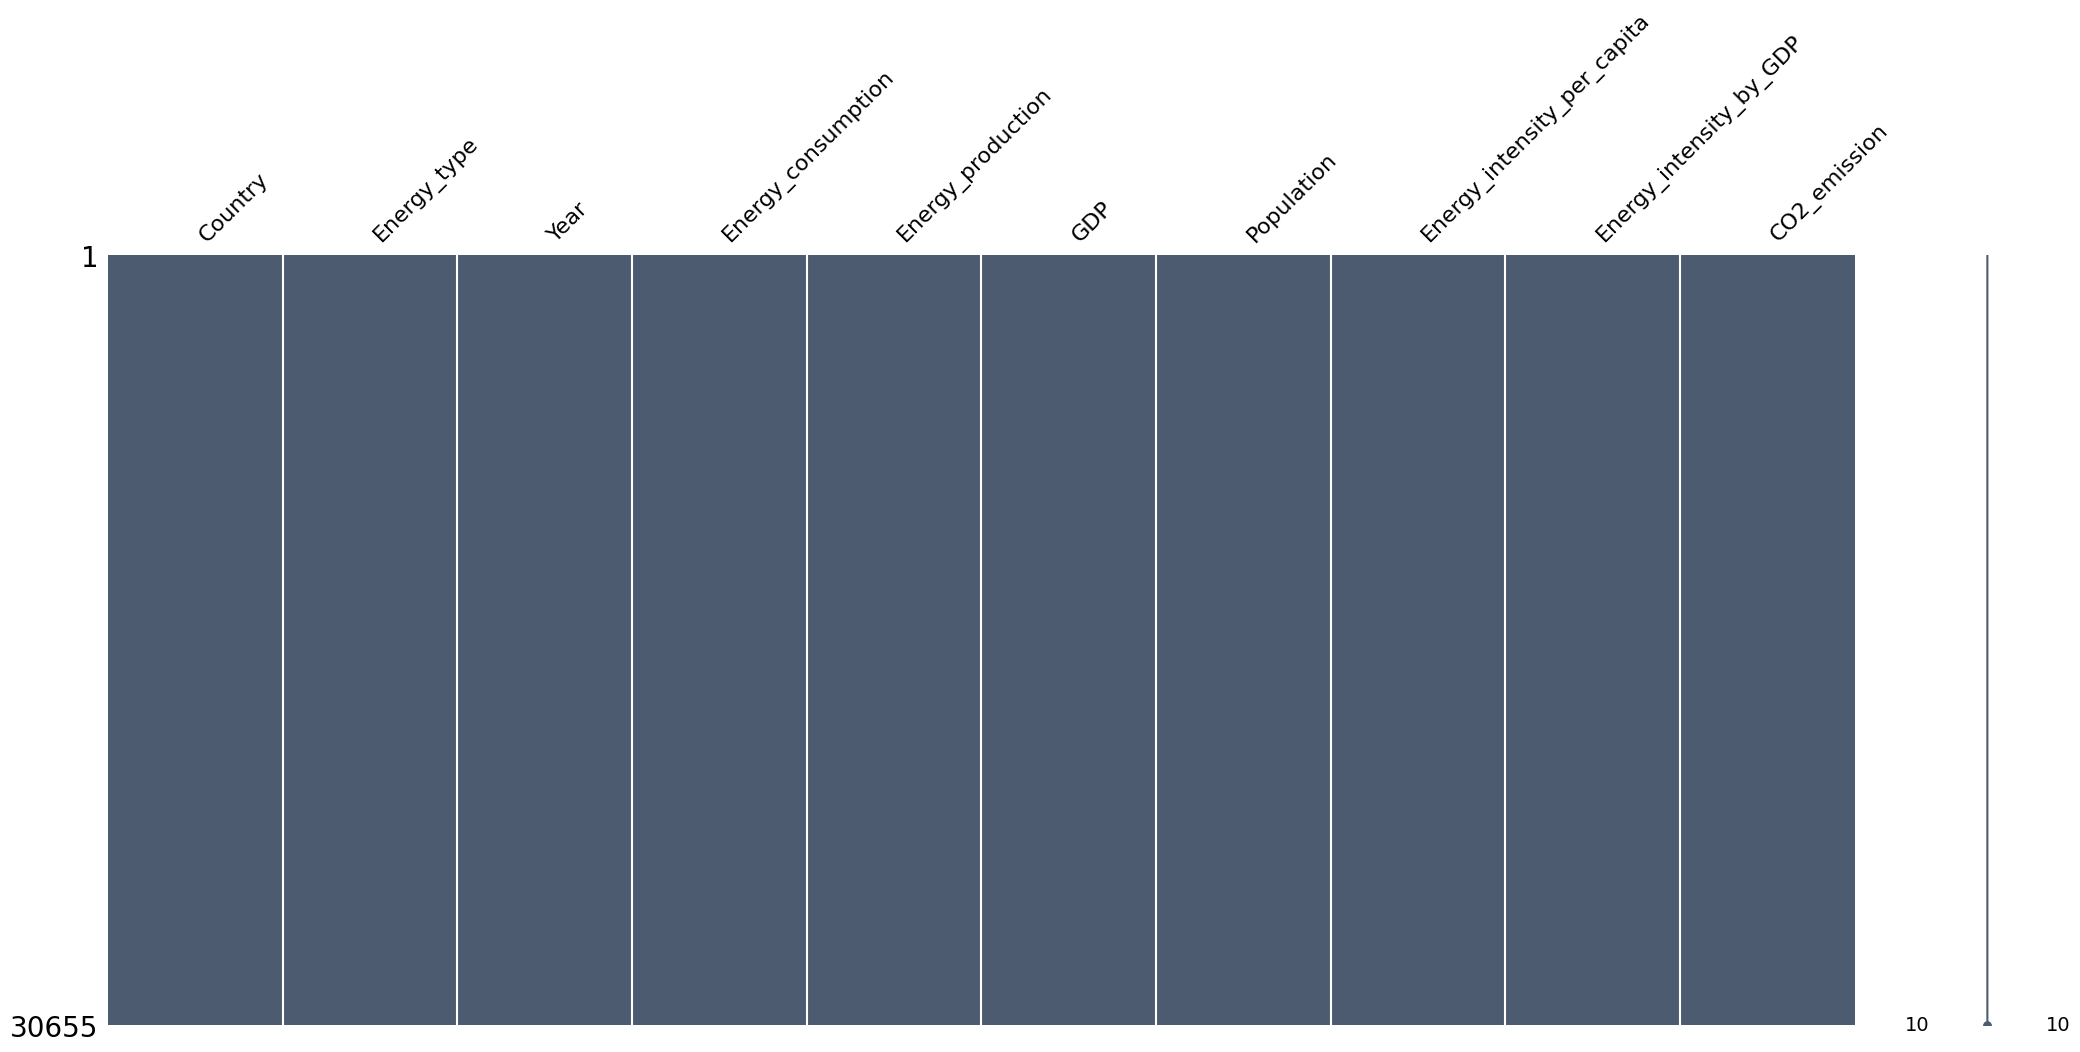

In [327]:
msno.matrix(dataframe,color=(0.3,0.36,0.44))

#Kmeans

In [328]:
# Suponiendo que 'Country' es la columna que deseas filtrar y eliminar las filas con valor 'World'
columna_country = 'Country'
valor_a_eliminar = 'World'

# Filtrar y eliminar las filas donde 'Country' tiene el valor 'World'
dataframe = dataframe[dataframe[columna_country] != valor_a_eliminar]

In [329]:
# Supongamos que 'Energy_type' es la columna que contiene los valores que deseas reemplazar
columna_energy_type = 'Energy_type'

# Definir el diccionario de mapeo para los reemplazos
mapeo_energy_type = {
    'all_energy_types': 0,
    'coal': 1,
    'natural_gas': 2,
    'petroleum_n_other_liquids': 3,
    'nuclear': 4,
    'renewables_n_other': 5
}

# Realizar el reemplazo utilizando el método replace
dataframe[columna_energy_type] = dataframe[columna_energy_type].replace(mapeo_energy_type)

# Imprimir el DataFrame actualizado
print(dataframe)

           Country  Energy_type  Year  Energy_consumption  Energy_production  \
6      Afghanistan            0  1993            0.031069           0.016076   
7      Afghanistan            1  1993            0.000146           0.000139   
8      Afghanistan            2  1993            0.011092           0.011092   
9      Afghanistan            3  1993            0.014644           0.000000   
10     Afghanistan            4  1993            0.000000           0.000000   
...            ...          ...   ...                 ...                ...   
30715     Zimbabwe            1  2019            0.045064           0.075963   
30716     Zimbabwe            2  2019            0.000000           0.000000   
30717     Zimbabwe            3  2019            0.055498           0.000000   
30718     Zimbabwe            4  2019            0.000000           0.000000   
30719     Zimbabwe            5  2019            0.068089           0.067499   

           GDP  Population  Energy_inte

##KMEANS  sin normalizar

In [330]:
X = dataframe

y = dataframe['Country']

In [331]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Country'] = le.fit_transform(X['Country'])

y = le.transform(y)

In [332]:
X.info()
X

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30493 entries, 6 to 30719
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      30493 non-null  int64  
 1   Energy_type                  30493 non-null  int64  
 2   Year                         30493 non-null  int64  
 3   Energy_consumption           30493 non-null  float64
 4   Energy_production            30493 non-null  float64
 5   GDP                          30493 non-null  float64
 6   Population                   30493 non-null  float64
 7   Energy_intensity_per_capita  30493 non-null  float64
 8   Energy_intensity_by_GDP      30493 non-null  float64
 9   CO2_emission                 30493 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.6 MB


Country  Energy_type  Year  Energy_consumption  Energy_production  \
6            0            0  1993            0.031069           0.016076   
7            0            1  1993            0.000146           0.000139   
8            0            2  1993            0.011092           0.011092   
9            0            3  1993            0.014644           0.000000   
10           0            4  1993            0.000000           0.000000   
...        ...          ...   ...                 ...                ...   
30715      188            1  2019            0.045064           0.075963   
30716      188            2  2019            0.000000           0.000000   
30717      188            3  2019            0.055498           0.000000   
30718      188            4  2019            0.000000           0.000000   
30719      188            5  2019            0.068089           0.067499   

           GDP  Population  Energy_intensity_per_capita  \
6      24.2715     15816.6                     1.964312   
7      24.2715     15816.6                     1.964312   
8      24.2715     15816.6                     1.964312   
9      24.2715     15816.6                     1.964312   
10     24.2715     15816.6                     1.964312   
...        ...         ...                          ...   
30715  37.6204     14654.2                    11.508701   
30716  37.6204     14654.2                    11.508701   
30717  37.6204     14654.2                    11.508701   
30718  37.6204     14654.2                    11.508701   
30719  37.6204     14654.2                    11.508701   

       Energy_intensity_by_GDP  CO2_emission  
6                     1.280050      1.704078  
7                     1.280050      0.015551  
8                     1.280050      0.588528  
9                     1.280050      1.100000  
10                    1.280050      0.000000  
...                        ...           ...  
30715                 4.482962      4.586869  
30716                 4.482962      0.000000  
30717                 4.482962      4.377890  
30718                 4.482962      0.000000  
30719                 4.482962      0.000000  

[30493 rows x 10 columns]

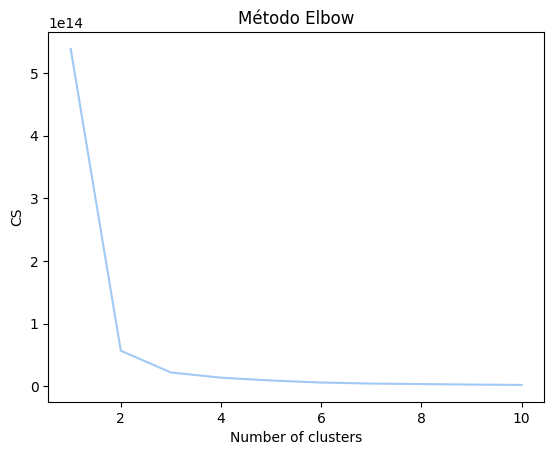

In [333]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [334]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# # Supongamos que tienes un DataFrame llamado 'dataframe' con las características que deseas utilizar para el clustering
# # y que ya has realizado la preparación de datos, como normalización y manejo de valores nulos

# # Selecciona las características que utilizarás para el clustering (por ejemplo, 'Feature1', 'Feature2', etc.)
# features = ['CO2_emission','Energy_consumption','Population','GDP']
# # Obtiene las características seleccionadas del DataFrame
# X = dataframe[features]

# # Opcional: Realiza la estandarización de las características para que tengan media cero y desviación estándar uno
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Supongamos que deseas dividir los datos en 5 clústeres (k=5)
# k = 5

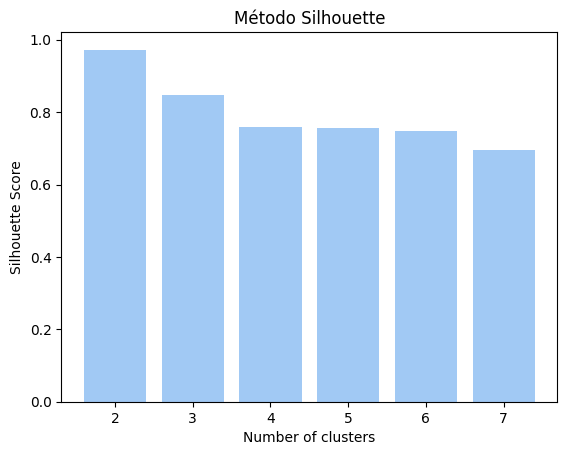

In [335]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.title('Método Silhouette')
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

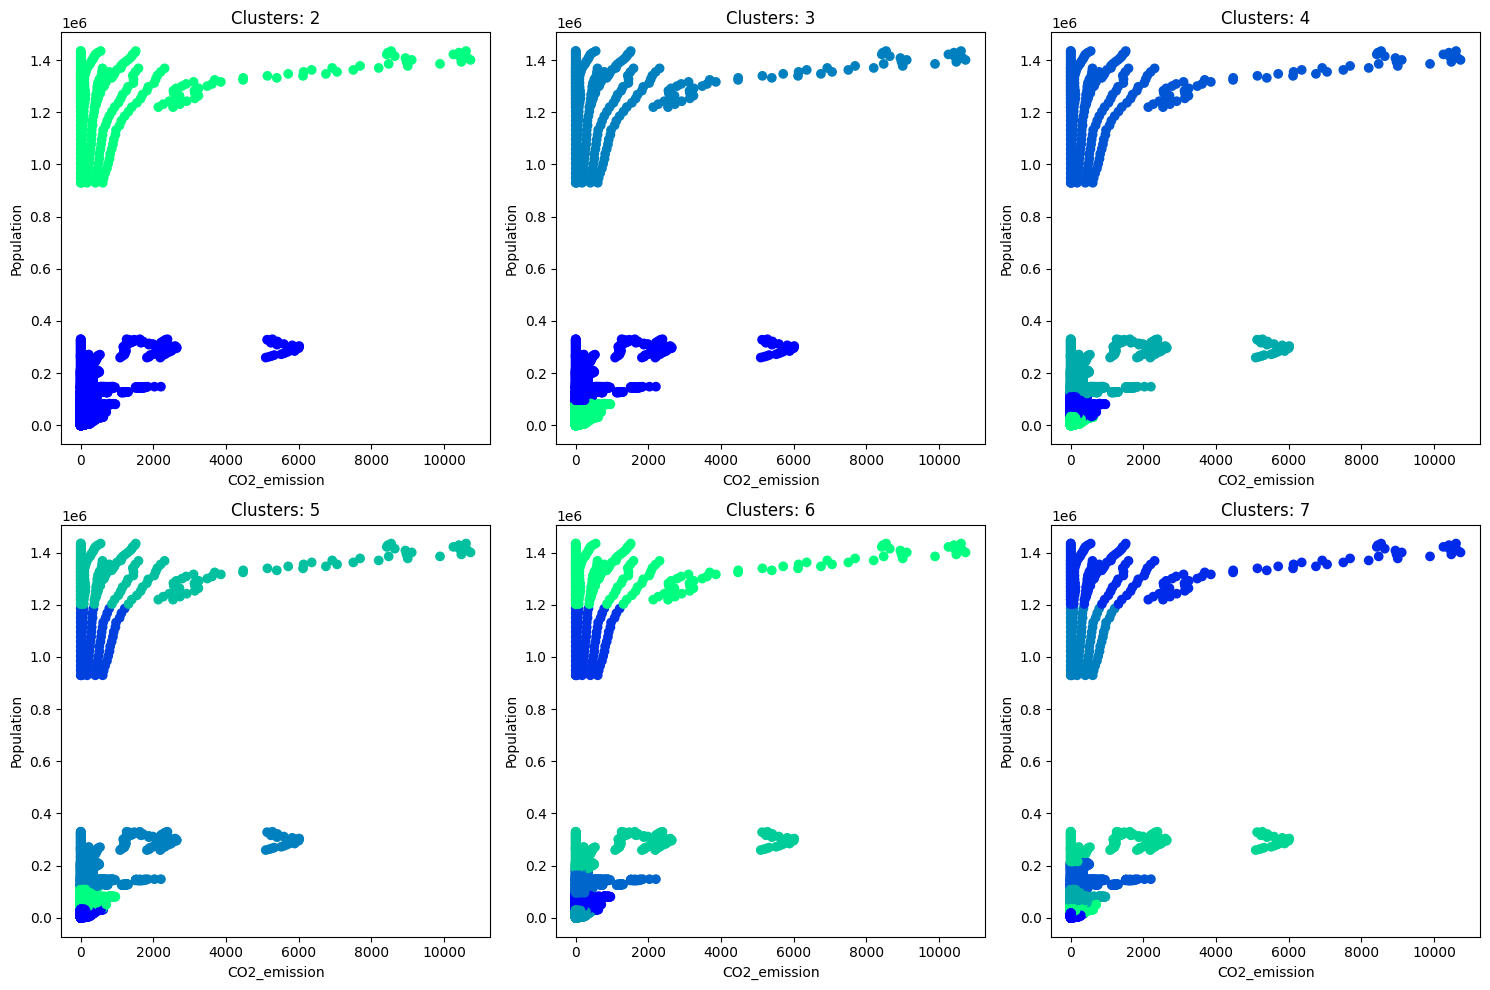

In [336]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supongamos que tienes un DataFrame llamado 'X' con las características que deseas utilizar para el clustering

# Definir los valores de k que quieres probar
k_values = (2, 3, 4, 5, 6,7)

# Crear una matriz de 2x3 para mostrar las sucesiones de gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre los valores de k y mostrar los gráficos en la matriz
for i, k in enumerate(k_values):
    ax = axs[i//3, i%3]  # Obtener el eje correspondiente en la matriz
    labels = KMeans(n_clusters=k, max_iter=1000, n_init=25 ).fit_predict(X)
    ax.scatter(X['CO2_emission'], X['Population'], c=labels, cmap=plt.cm.winter)
    ax.set_title(f'Clusters: {k}')
    ax.set_xlabel('CO2_emission')
    ax.set_ylabel('Population')

# Ajustar los espacios entre subplots para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


## Kmeans normalizando y reduccion de variables

In [337]:
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes un DataFrame llamado 'dataframe' con las características que deseas normalizar
# y que 'Country', 'Energy_type' y 'Year' son las columnas que deseas mantener sin normalizar

# Selecciona las características que deseas normalizar
features_to_normalize = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']

# Obtiene las características seleccionadas y las columnas no normalizadas del DataFrame
selected_columns = ['Country', 'Energy_type', 'Year'] + features_to_normalize
data_to_normalize = dataframe[features_to_normalize]
data_non_normalized = dataframe[selected_columns]

# Crea un objeto StandardScaler para realizar la normalización
scaler = StandardScaler()

# Aplica el escalado a las características seleccionadas
data_normalized = scaler.fit_transform(data_to_normalize)

# Crea un nuevo DataFrame con las características normalizadas
dataframe_normalized = pd.DataFrame(data_normalized, columns=features_to_normalize)

# Concatena las características normalizadas con las columnas no normalizadas del DataFrame original
dataframe_normalized = pd.concat([data_non_normalized, dataframe_normalized], axis=1)

# Imprime el DataFrame con las características normalizadas y las columnas no normalizadas
dataframe_normalized.head(2)

Country  Energy_type    Year  Energy_consumption  Energy_production  \
6      0.0          0.0  1993.0            0.031069           0.016076   
7      0.0          1.0  1993.0            0.000146           0.000139   

       GDP  Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
6  24.2715     15816.6                     1.964312                  1.28005   
7  24.2715     15816.6                     1.964312                  1.28005   

   CO2_emission  Energy_consumption  Energy_production       GDP  Population  \
6      1.704078           -0.150542          -0.164937 -0.278673   -0.240232   
7      0.015551           -0.164424          -0.177988 -0.278673   -0.240232   

   Energy_intensity_per_capita  Energy_intensity_by_GDP  CO2_emission  
6                     -0.52279                 0.422897     -0.130843  
7                     -0.52279                 0.422897     -0.140460

In [338]:
# Eliminar los valores nulos del DataFrame dataframe_normalized
dataframe_normalized = dataframe_normalized.dropna()

# Imprimir el DataFrame actualizado sin los valores nulos
print(dataframe_normalized)

       Country  Energy_type    Year  Energy_consumption  Energy_production  \
6          0.0          0.0  1993.0            0.031069           0.016076   
7          0.0          1.0  1993.0            0.000146           0.000139   
8          0.0          2.0  1993.0            0.011092           0.011092   
9          0.0          3.0  1993.0            0.014644           0.000000   
10         0.0          4.0  1993.0            0.000000           0.000000   
...        ...          ...     ...                 ...                ...   
30488    150.0          2.0  2019.0            0.000000           0.000000   
30489    150.0          3.0  2019.0            0.015886           0.000000   
30490    150.0          4.0  2019.0            0.000000           0.000000   
30491    150.0          5.0  2019.0            0.000045           0.000045   
30492    151.0          0.0  2019.0            0.014085           0.001691   

             GDP   Population  Energy_intensity_per_capita  \
6

<Axes: >

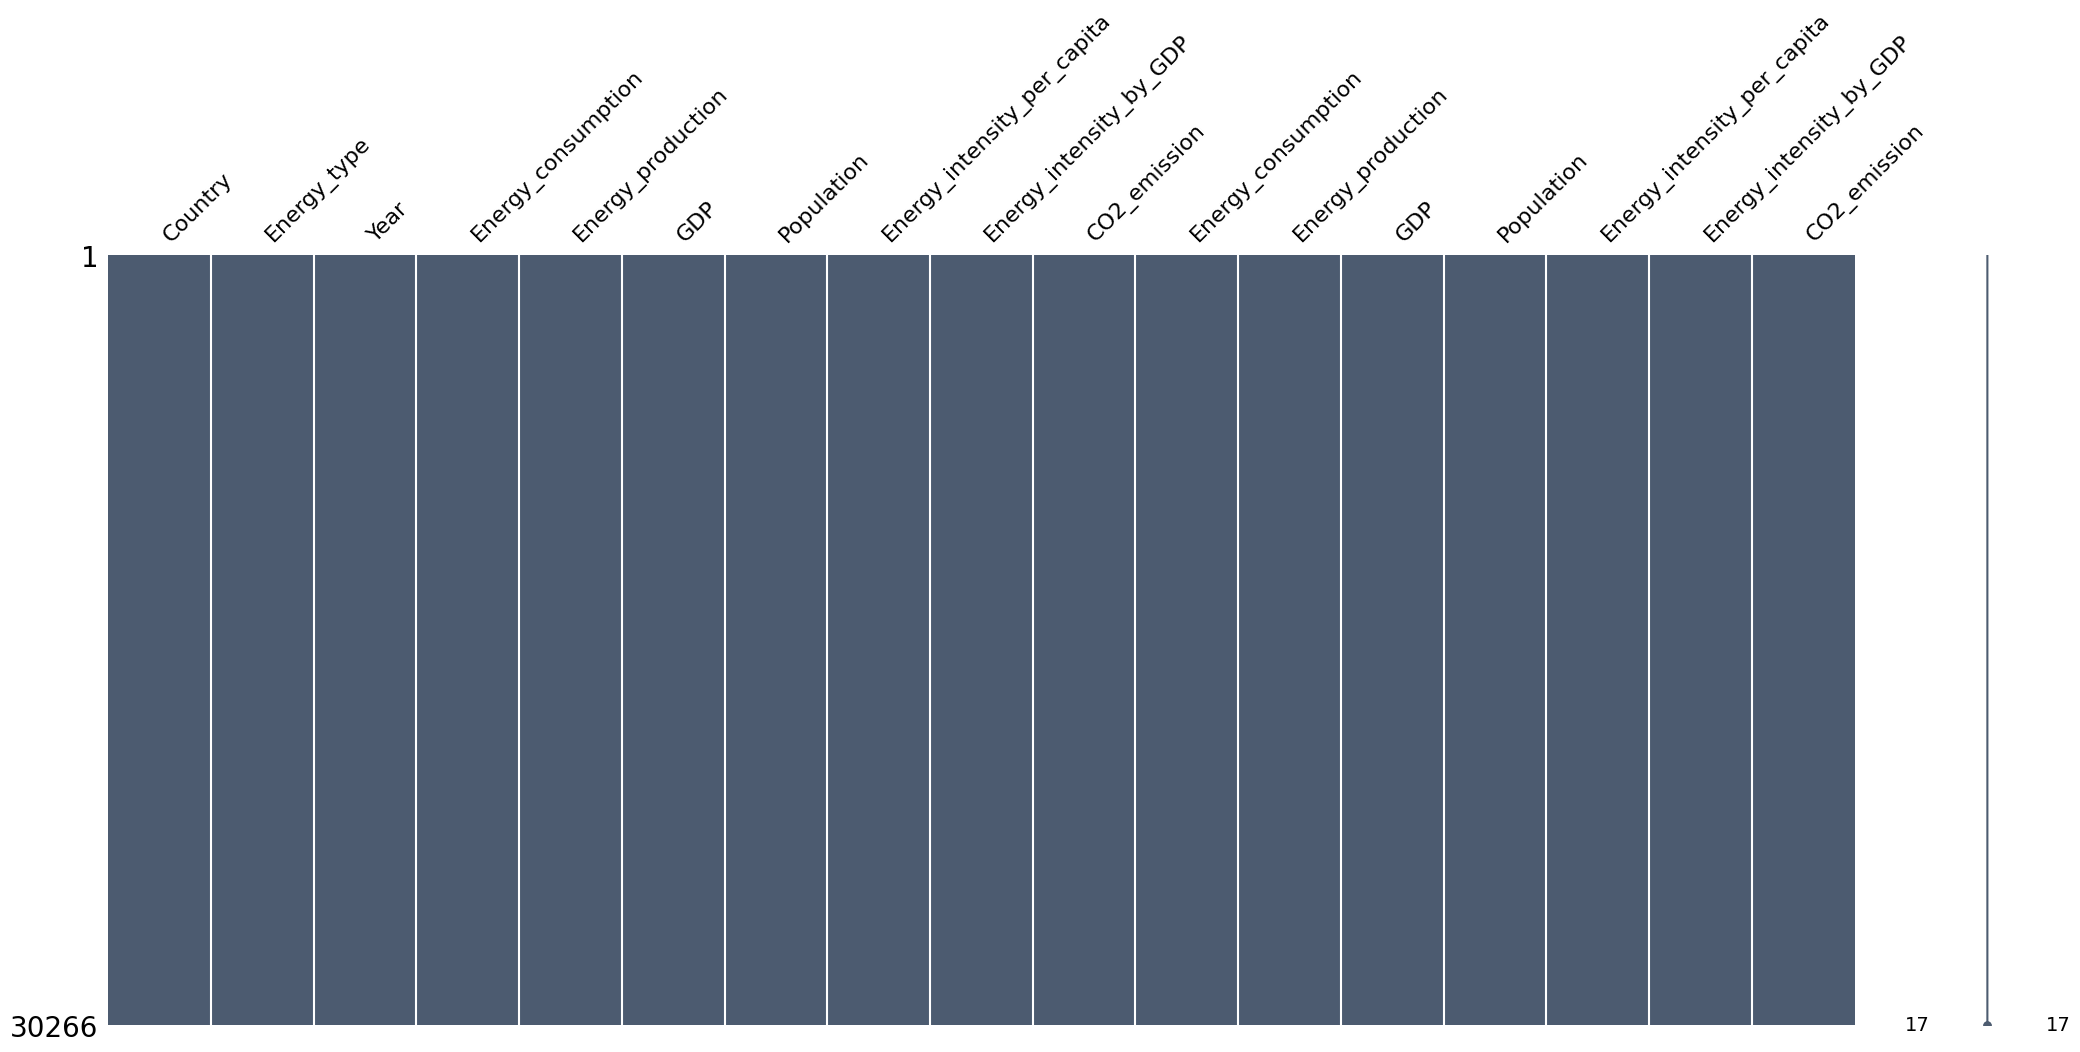

In [339]:
# Eliminar los valores nulos del DataFrame dataframe_normalized
dataframe_normalized = dataframe_normalized.dropna()

# Imprimir el DataFrame actualizado sin los valores nulos
msno.matrix(dataframe_normalized,color=(0.3,0.36,0.44))

In [340]:
#Cambio de nombre de las columnas

dataframe_normalized.columns = ['Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission', 'Energy_consumption_norm',
       'Energy_production_norm', 'GDP_norm', 'Population_norm', 'Energy_intensity_per_capita_norm',
       'Energy_intensity_by_GDP_norm', 'CO2_emission_norm']

#'Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission'
dataframe_normalized.columns

Index(['Country', 'Energy_type', 'Year', 'Energy_consumption',
       'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita',
       'Energy_intensity_by_GDP', 'CO2_emission', 'Energy_consumption_norm',
       'Energy_production_norm', 'GDP_norm', 'Population_norm',
       'Energy_intensity_per_capita_norm', 'Energy_intensity_by_GDP_norm',
       'CO2_emission_norm'],
      dtype='object')

In [341]:
columns_to_drop = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']

# Eliminar las columnas especificadas utilizando el método 'drop'
dataframe_normalized.drop(columns=columns_to_drop, inplace=True)

In [342]:
X_norm = dataframe_normalized

y_norm = dataframe_normalized['Country']

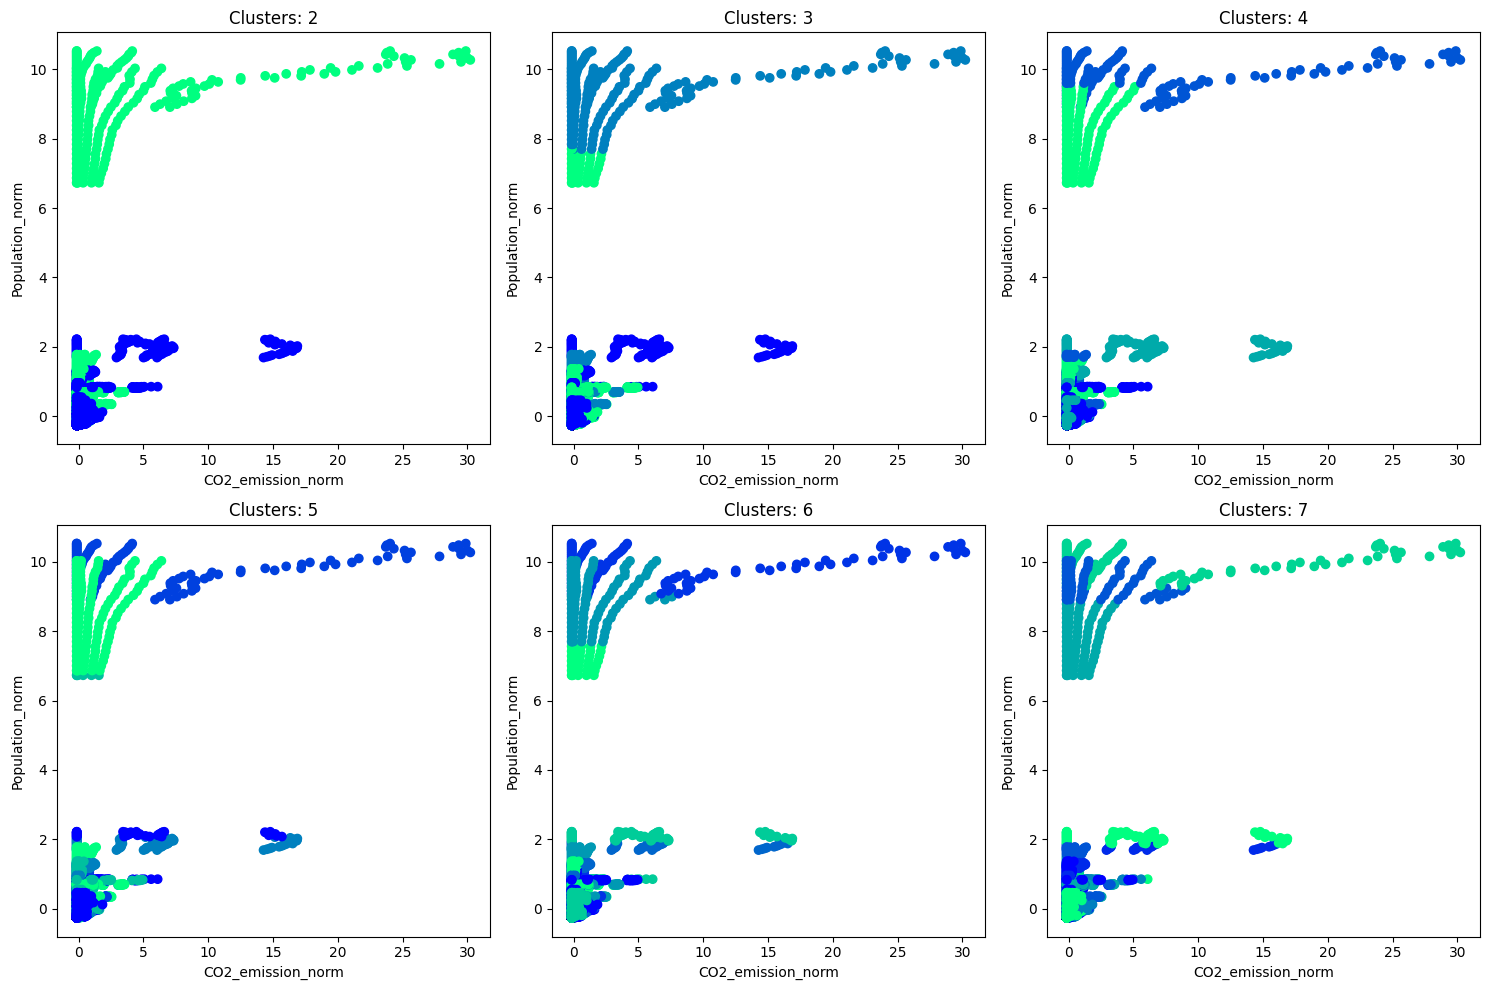

In [343]:
# Supongamos que tienes un DataFrame llamado 'X' con las características que deseas utilizar para el clustering

# Definir los valores de k que quieres probar
k_values = (2, 3, 4, 5, 6,7)

# Crear una matriz de 2x3 para mostrar las sucesiones de gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre los valores de k y mostrar los gráficos en la matriz
for i, k in enumerate(k_values):
    ax = axs[i//3, i%3]  # Obtener el eje correspondiente en la matriz
    labels = KMeans(n_clusters=k, max_iter=1000, n_init=25).fit_predict(X_norm)
    ax.scatter(X_norm['CO2_emission_norm'], X_norm['Population_norm'], c=labels, cmap=plt.cm.winter)
    ax.set_title(f'Clusters: {k}')
    ax.set_xlabel('CO2_emission_norm')
    ax.set_ylabel('Population_norm')

# Ajustar los espacios entre subplots para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


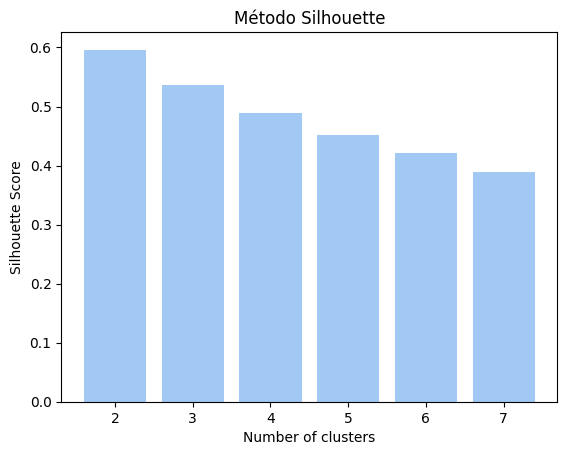

In [344]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X_norm, KMeans(n_clusters = n_cluster).fit_predict(X_norm)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.title('Método Silhouette')
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

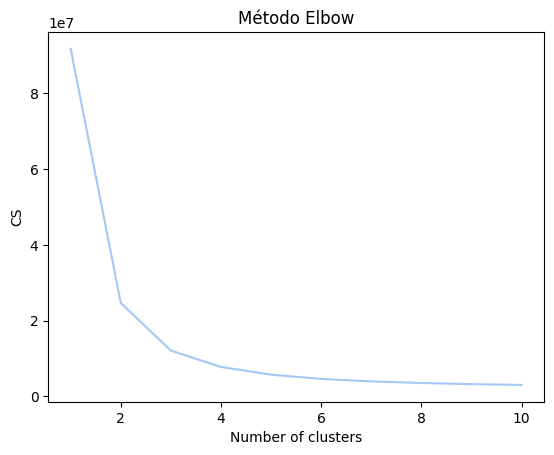

In [345]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(X_norm)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

##PCA

In [346]:
from sklearn.decomposition import PCA

In [347]:
pca = PCA(n_components=3)
pca.fit(X)

explained_Variance = pca.explained_variance_ratio_
PCA_ds = pd.DataFrame(pca.transform(X), columns=(["feature1","feature2", "feature3"]))
PCA_ds.describe().T

count          mean            std           min           25%  \
feature1  30493.0 -2.076868e-12  132901.920317 -35104.731051 -33133.007742   
feature2  30493.0 -2.672440e-14    1226.349046  -7130.775514   -213.185706   
feature3  30493.0  7.158323e-15     279.282844  -3210.264978     -3.054370   

                   50%           75%           max  
feature1 -27656.696433 -11834.660303  1.399534e+06  
feature2   -183.100272    -78.570998  1.772003e+04  
feature3     11.003788     14.643390  8.234939e+03

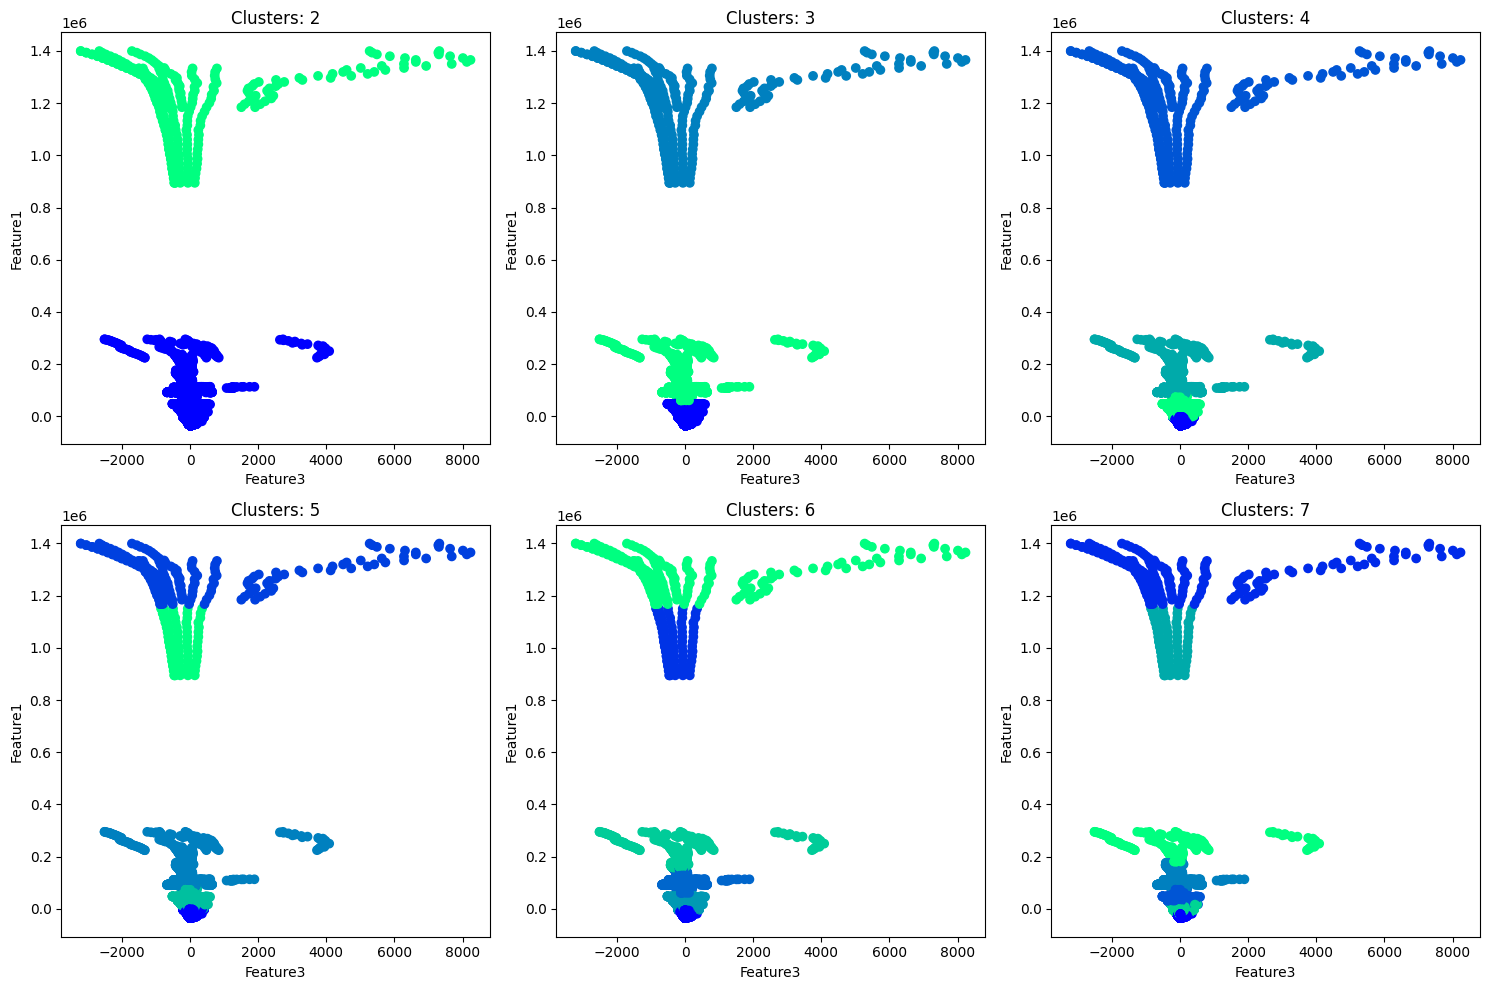

In [350]:
# Supongamos que tienes un DataFrame llamado 'X' con las características que deseas utilizar para el clustering

# Definir los valores de k que quieres probar
k_values = (2, 3, 4, 5, 6,7)

# Crear una matriz de 2x3 para mostrar las sucesiones de gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre los valores de k y mostrar los gráficos en la matriz
for i, k in enumerate(k_values):
    ax = axs[i//3, i%3]  # Obtener el eje correspondiente en la matriz
    labels = KMeans(n_clusters=k, max_iter=1000, n_init=25).fit_predict(PCA_ds)
    ax.scatter(PCA_ds['feature3'], PCA_ds['feature1'], c=labels, cmap=plt.cm.winter)
    ax.set_title(f'Clusters: {k}')
    ax.set_xlabel('Feature3')
    ax.set_ylabel('Feature1')

# Ajustar los espacios entre subplots para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


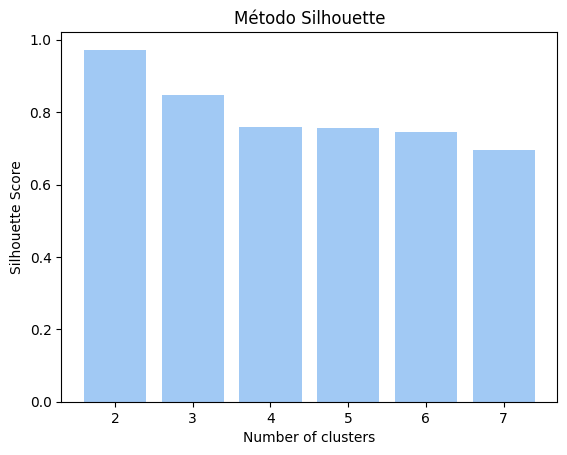

In [231]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(PCA_ds, KMeans(n_clusters = n_cluster).fit_predict(PCA_ds)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.title('Método Silhouette')
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

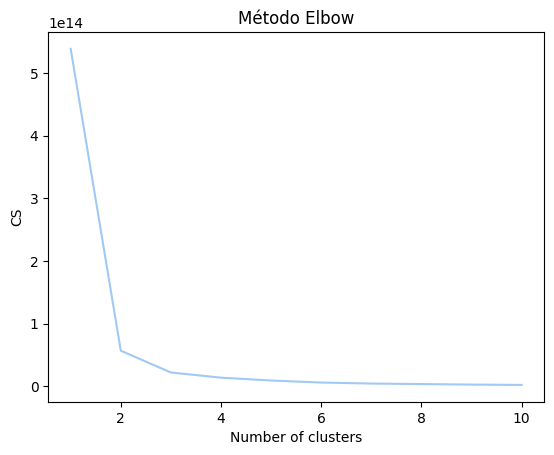

In [232]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(PCA_ds)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

###PCA normalizado


In [233]:
pca_n = PCA()
pca_n.fit(X_norm)

PCA()

In [234]:
pca = PCA(n_components=3)
pca.fit(X_norm)

explained_Variance = pca.explained_variance_ratio_
PCA_ds_n = pd.DataFrame(pca.transform(X_norm), columns=(["feature1","feature2", "feature3"]))
PCA_ds_n.describe().T

count          mean        std        min        25%       50%  \
feature1  30266.0 -9.015014e-16  54.427207 -93.377408 -47.331574 -0.346207   
feature2  30266.0 -4.832047e-14   7.727429 -13.563408  -6.892095 -0.043831   
feature3  30266.0 -5.305711e-16   1.946855  -1.254969  -0.654052 -0.266172   

                75%        max  
feature1  46.679757  94.692041  
feature2   6.819091  13.744332  
feature3   0.124169  50.383359

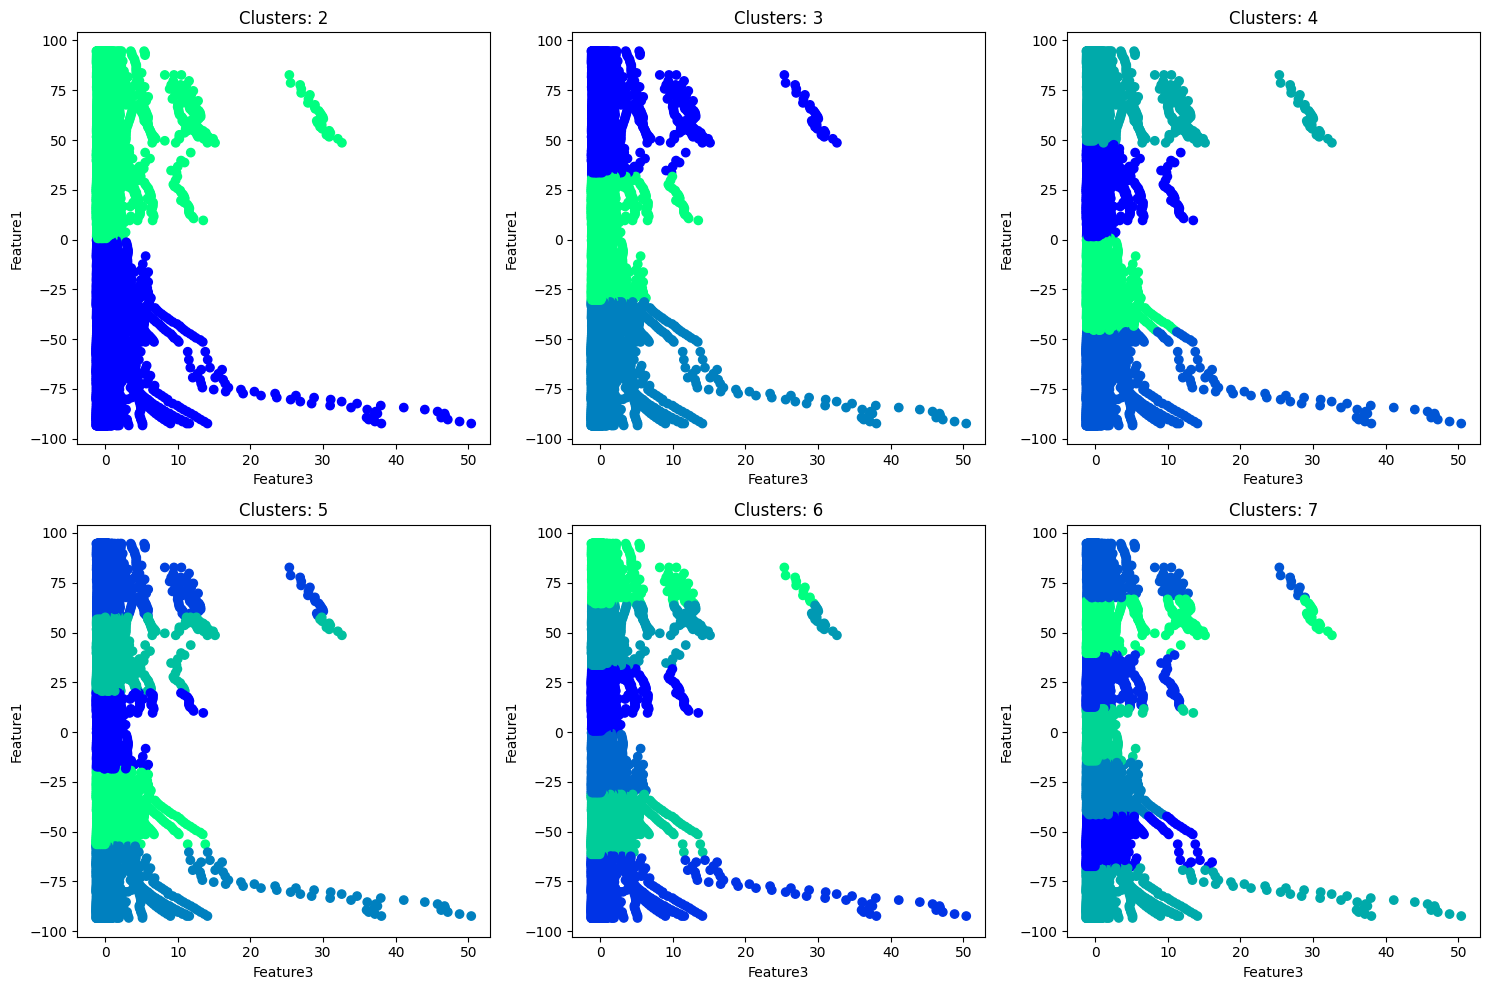

In [349]:
# Supongamos que tienes un DataFrame llamado 'X' con las características que deseas utilizar para el clustering

# Definir los valores de k que quieres probar
k_values = (2, 3, 4, 5, 6,7)

# Crear una matriz de 2x3 para mostrar las sucesiones de gráficos
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterar sobre los valores de k y mostrar los gráficos en la matriz
for i, k in enumerate(k_values):
    ax = axs[i//3, i%3]  # Obtener el eje correspondiente en la matriz
    labels = KMeans(n_clusters=k, max_iter=1000, n_init=25).fit_predict(PCA_ds_n)
    ax.scatter(PCA_ds_n['feature3'], PCA_ds_n['feature1'], c=labels, cmap=plt.cm.winter)
    ax.set_title(f'Clusters: {k}')
    ax.set_xlabel('Feature3')
    ax.set_ylabel('Feature1')

# Ajustar los espacios entre subplots para evitar superposición de etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [236]:
# Lista para almacenar los valores del coeficiente de silueta
silhouette_scores = []

# Definir los valores de k que quieres probar
k_values = (2, 3, 4, 5, 6, 7)

# Iterar sobre los valores de k y calcular el coeficiente de silueta para cada k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=25)
    labels = kmeans.fit_predict(PCA_ds_n)
    silhouette_scores.append(silhouette_score(PCA_ds_n, labels))

# Imprimir los resultados
for k, score in zip(k_values, silhouette_scores):
    print(f"Clusters: {k}, Coeficiente de silueta: {score}")

Clusters: 2, Coeficiente de silueta: 0.5986907053027524
Clusters: 3, Coeficiente de silueta: 0.5414756898462321
Clusters: 4, Coeficiente de silueta: 0.4964120211579533
Clusters: 5, Coeficiente de silueta: 0.4613892620261243
Clusters: 6, Coeficiente de silueta: 0.43164675435251626
Clusters: 7, Coeficiente de silueta: 0.4016266358678453


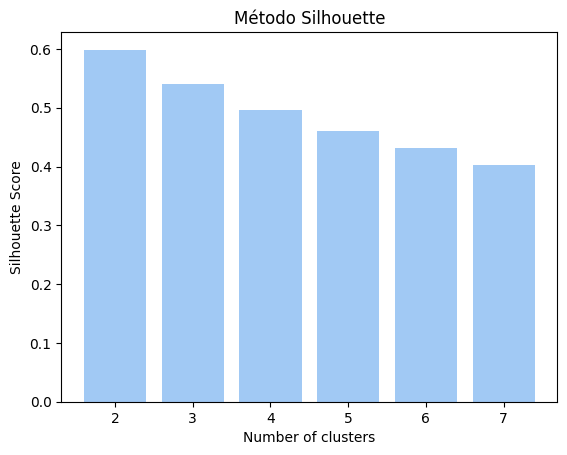

In [237]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(PCA_ds_n, KMeans(n_clusters = n_cluster).fit_predict(PCA_ds_n)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.title('Método Silhouette')
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

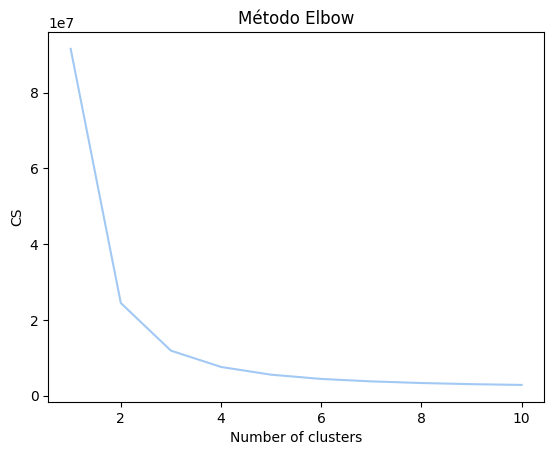

In [238]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(PCA_ds_n)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('Método Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()